In [ ]:
!pip install pulp
# !apt-get install -y -qq glpk-utils
# !pip install pandas.plotting

     |████████████████████████████████| 14.2 MB 9.1 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import table
import os, sys, json
from pulp import *
%matplotlib inline
pd.set_option('display.max_columns', None)

## **INITIALIZING THE PARAMETERS**

In [ ]:
# Maximum shifts that nurse will work 
nurse_max_shifts = 6
nurse_per_shift = [9,5,3]
# Nurse works either 6hrs, 6hrs, 12hrs in a day
nurse_working_shift = range(1,nurse_max_shifts+1)

# Planning Length is 4 weeks
planning_length = 4

# Number of shift per day:
daily_shift = [0,1,2]

# Label the days from Monday to Sunday
days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
day_week = range(1,84)

## Create shift names based on index:
shift_name = []

for week in range(1,planning_length+1):
  for day in days:
   for j in daily_shift:
    shift_name.append('week'+str(week)+'_'+str(day)+'_'+str(j))

standby_name = []
for week in range(1,planning_length+1):
  for day in days:
    standby_name.append('week'+str(week)+'_'+str(day))

day_off_name = []
for week in range(1,planning_length+1):
  for day in days:
   day_off_name.append('week'+str(week)+'_'+str(day))

In [ ]:
# Create the require_nurses dataframe
# morning_nurses : Number of nurses required in morning shift.
# afternoon_nurses : Number of nurses required in afternoon shift.
# night_nurses : Number of nurses required in the night shift

shifts = range(len(daily_shift)*7*planning_length)


r = nurse_per_shift*7*planning_length

standby_per_shift = [1,1,1]
p = standby_per_shift*7*planning_length

# Total number of the nurses.
total = 25 #int(sum(r)/(nurse_max_shifts-1)/planning_length)

#Create nurses_id tag and nurse list
nurses = range(total)
others = range(2,25)
# nurses_id = ['nurse'+str(i) for i in range(total)]

nurses_id = ['PNO_1','PNO_2','SNO_1','SNO_2','NO_1','NO_2','NO_3','N0_4'
,'SSN_1','SSN_2','SSN_3','SSN_4','SSN_5','SSN_6','SSN_7','SSN_8','SSN_9'
,'SSN_10','SSN_11','SN_1','SN_2','PNA','SNA','NA','PHCA']




#print("\nThe nurses are:")
#print(nurses_id)

"""
shifts: label each shift. For example: Monday morning shift is 0,
Monday afternoon shift is 1, Monday night shift is 2 etc.
nurses: label each nurse. Simpley use integers to represent.
"""

#Morning Shift
Nm  = []
PNO = nurses[0:2]
SNO = nurses[2:4]
NO = nurses[4:8]
SSN= nurses[8:19]
SN  = nurses[19:21]


for i in nurses:
    if i == 12:
        Nm.append(i)
    elif i == 18:
        Nm.append(i)
        
Morning_only =[]
for pno in PNO:
  Morning_only.append(pno)
for nm in Nm:
  Morning_only.append(nm)

#Senior Nurses
Senior_nurses =nurses[2:7]


Pno = nurses_id[0:2]
Sno = nurses_id[2:4]
No  = nurses_id[4:8]
Ssn = nurses_id[8:19]
Sn  = nurses_id[19:21]
#Pna = nurses_id[21:22]
#Na  = nurses_id[22:23]
#PHCA = nurses_id[23:24]

# Gender
Male = [Sno[0],No[0],Ssn[0],Ssn[1],Ssn[2],Ssn[3],Sn[0],Sn[1]]
Female = [x for x in nurses_id if x not in Male]


Gender_nurses = []
for g in Female:
  g = 1
  Gender_nurses.append(g)
  
for g in Male:
  g = 0
  Gender_nurses.append(g)


In [ ]:
for i in range(0,84):
  print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83


In [ ]:
shifts

range(0, 84)

In [ ]:
First_night= []
Second_night = []
Third_night =[]
Fourth_night = []
Fifth_night = []
Sixth_night = []
Seventh_night = []

for i in nurses:
  if i ==24:
    First_night.append(i)
  elif i == 2:
    First_night.append(i)
  elif i == 17:
    First_night.append(i)
  elif i == 11:
    Second_night.append(i)
  elif i == 3:
    Second_night.append(i)
  elif i == 19:
    Second_night.append(i)
  elif i == 8:
    Third_night.append(i)
  elif i == 4:
    Third_night.append(i)
  elif i == 22:
    Third_night.append(i)
  elif i == 13:
    Fourth_night.append(i)
  elif i == 5:
    Fourth_night.append(i)
  elif i == 20:
    Fourth_night.append(i)
  elif i == 14:
    Fifth_night.append(i)
  elif i == 21:
    Fifth_night.append(i)
  elif i == 6:
    Fifth_night.append(i)
  elif i == 15:
    Sixth_night.append(i)
  elif i == 7:
    Sixth_night.append(i)
  elif i == 9:
    Sixth_night.append(i)
  elif i == 16:
    Seventh_night.append(i)
  elif i == 10:
    Seventh_night.append(i)
  elif i == 23:
    Seventh_night.append(i)
    



In [ ]:
# Male

In [ ]:
print(First_night)
print(Second_night)
print(Third_night)
print(Fourth_night)
print(Fifth_night)
print(Sixth_night)
print(Seventh_night)

[2, 17, 24]
[3, 11, 19]
[4, 8, 22]
[5, 13, 20]
[6, 14, 21]
[7, 9, 15]
[10, 16, 23]


## **SETTING THE PROBLEM VARIABLE**

In [ ]:
# The prob variable is created to contain the problem data
prob = LpProblem("Nurse_Scheduling",LpMinimize)
print(prob)

Nurse_Scheduling:
MINIMIZE
None
VARIABLES



## **DECISION VARIABLES**

In [ ]:
# Creating the Decision variables.
x = {(i,j):pulp.LpVariable("schdule_{0}_{1}".format(i,j), cat="Binary")
for i in nurses for j in shifts}

y = {(i,j):pulp.LpVariable('standby_{0}_{1}'.format(i,j),cat='Binary')
for i in nurses for j in shifts}

# y ={(i,j,d):pulp.LpVariable('standby_{0}_{1}'.format(i,j,d),cat='Binary')
# for i in nurses for j in shifts for d in day_week}

z = {(i,j):pulp.LpVariable('dayoff_{0}_{1}'.format(i,j),cat='Binary')
 for i in nurses for j in shifts}

## **CONSTRAINT**

In [ ]:
# Maximum number of Consecutive night shifts should be 4
for i in First_night:
  prob.addConstraint(
    lpSum(x[(i,j)] for j in shifts if (j+1)%3==0 ) ==4
  )
  for j in shifts:
    if (j+1)%3 == 0 and j<shifts[-81]:
      prob.addConstraint(
          x[(i,j)] + x[(i,j+3)]+x[(i,j+6)]+x[i,j+9]+z[i,j+12]+z[i,j+15]+z[i,j+18] == 7
        )
      for i in Second_night:
        prob.addConstraint(
         x[(i,j+12)]+x[(i,j+15)]+x[(i,j+18)]+x[(i,j+21)]+z[(i,j+24)]+z[(i,j+27)]+z[(i,j+30)] ==7
            )
      for i in Third_night:
        prob.addConstraint(
         x[(i,j+24)]+x[(i,j+27)]+x[(i,j+30)]+x[(i,j+33)]+z[(i,j+36)]+z[(i,j+39)]+z[(i,j+42)] ==7
            )
      for i in Fourth_night:
        prob.addConstraint(
            x[(i,j+36)]+x[(i,j+39)]+x[(i,j+42)]+x[i,j+45]+z[(i,j+48)]+z[(i,j+51)]+z[(i,j+54)] ==7
        )
      for i in Fifth_night:
        prob.addConstraint(
            x[(i,j+48)]+x[(i,j+51)]+x[(i,j+54)]+x[i,j+57]+z[(i,j+60)]+z[(i,j+63)]+z[(i,j+66)] ==7
        )
      for i in Sixth_night:
        prob.addConstraint(
            x[(i,j+60)]+x[(i,j+63)]+x[(i,j+66)]+x[i,j+69]+z[(i,j+72)]+z[(i,j+75)]+z[(i,j+78)] ==7
        )
      for i in Seventh_night:
        prob.addConstraint(
            x[(i,j+72)]+x[(i,j+75)]+x[(i,j+78)]+x[i,j+81] == 4
        )
  
   

In [ ]:
# # # Maximum number of afternoon shifts is 3


# #for i in set(nurses)-set(Morning_only):
# for i in nurses:
# #for i in other_nurse:
#   for n in range(planning_length):
#     begin, end = 7*len(daily_shift)*n,7*len(daily_shift)*(n+1)
#     for j in shifts[begin:end]:
#       if j%3 == 0 and j<shifts[-81]:
#        prob.addConstraint(
#          lpSum(x[(i,j+s)] for s in daily_shift ) <=2
#       )  
       
# for i in nurses:
# #for i in other_nurse:
#   for n in range(planning_length):
#     begin, end = 7*len(daily_shift)*n,7*len(daily_shift)*(n+1)
#     for j in shifts[begin:end]:
#       if (j+2)%3 == 0 and j<shifts[-81]:
#        prob.addConstraint(
#          lpSum(x[(i,j+s)] for s in daily_shift ) <=2
#        )

# for i in set(nurses)-set(PNO):
for i in range(2,25):
  for n in range(planning_length):
    begin,end = 7*len(daily_shift)*n,7*len(daily_shift)*(n+1)
    prob.addConstraint(
        lpSum(x[(i,j)] for j in shifts[begin:end] if (j+2)%3==0) <=3
    )

      

In [ ]:
# Ensurs PNO and Nursing work only morning shifts
for i in PNO:
  for n in range(planning_length):
    begin, end = 7*len(daily_shift)*n,7*len(daily_shift)*(n+1)
    prob.addConstraint(
          lpSum(x[(i,j)] for j in shifts[begin:end] if (j+2)%3==0) + lpSum(x[(i,j)] for j in shifts[begin:end] if (j+1)%3==0)==0
      )


In [ ]:
weekend=[]
for j in shifts[15:21]:
  weekend.append(j)
for j in shifts[36:42]:
  weekend.append(j)
for j in shifts[57:63]:
  weekend.append(j)
for j in shifts[-6:]:
  weekend.append(j)

#Ensures PNO be off on weekends:
for i in PNO:
  prob.addConstraint(
        lpSum(x[(i,j)] for j in weekend) ==0
  )

# for i in nurses:
for i in PNO:
#for i in other_nurse:
  prob.addConstraint(
    lpSum(z[(i,j)] for j in shifts if j%3==0) + lpSum(z[(i,j)] for j in shifts if (j+1)%3==0) + lpSum(z[(i,j)] for j in shifts if (j+2)%3==0) <=6
  )

# for i in nurses:
for i in PNO:
#for i in other_nurse:
  for n in range(planning_length):
      begin,end = 7*len(daily_shift)*n,7*len(daily_shift)*(n+1)
      prob.addConstraint(
        lpSum( z[(i,j)] for j in shifts[begin:end] if j%3 == 0 ) +
        lpSum( z[(i,j)] for j in shifts[begin:end] if (j+1)%3 == 0 ) +
        lpSum( z[(i,j)] for j in shifts[begin:end] if (j+2)%3 == 0 )  ==1
      )
        
      prob.addConstraint(
        lpSum( y[(i,j)] for j in shifts[begin:end] if j%3 == 0 ) +
        lpSum( y[(i,j)] for j in shifts[begin:end] if (j+1)%3 == 0 ) +
        lpSum( y[(i,j)] for j in shifts[begin:end] if (j+2)%3 == 0 )  ==1
      )
    

        
# for i in PNO:
# #for i in other_nurse:
#   prob.addConstraint(
#     lpSum(y[(i,j)] for j in shifts if j%3==0) + lpSum(y[(i,j)] for j in shifts if (j+1)%3==0) + lpSum(y[(i,j)] for j in shifts if (j+2)%3==0) ==0
#   )



In [ ]:
#Ensures that the required number of nurses in each shift on each day is satisfied
for j in shifts:
  try:
    prob.addConstraint(
        lpSum(x[(i,j)] for i in nurses) == r[j]
         )
  except:
    print("len(shift) should be equal to len(require_nurses)")
    sys.exit(-1)
   

In [ ]:
# Ensures that the required number of nurses for standby in each shift on each day is satisfied
for j in shifts:
  try:
    prob.addConstraint(
        lpSum(y[(i,j)] for i in nurses) == p[j]
         )
  except:
    print("len(shift) should be equal to len(require_nurses)")
    sys.exit(-1)

In [ ]:
## for i in nurses:
for i in set(nurses)-set(Morning_only):
  prob.addConstraint(
    lpSum(z[(i,j)] for j in shifts if j%3==0) + lpSum(z[(i,j)] for j in shifts if (j+1)%3==0) + lpSum(z[(i,j)] for j in shifts if (j+2)%3==0) <=6
  )

# # for i in nurses:
# for i in set(nurses)-set(Morning_only):
# #for i in other_nurse:
#   for n in range(planning_length):
#       begin,end = 7*len(daily_shift)*n,7*len(daily_shift)*(n+1)
#       prob.addConstraint(
#         lpSum( z[(i,j)] for j in shifts[begin:end] if j%3 == 0 ) +
#         lpSum( z[(i,j)] for j in shifts[begin:end] if (j+1)%3 == 0 ) +
#         lpSum( z[(i,j)] for j in shifts[begin:end] if (j+2)%3 == 0 )  <=3
#       )

In [ ]:
# for i in nurses:
# #for i in other_nurse:
#   prob.addConstraint(
#     lpSum(y[(i,j)] for j in shifts if j%3==0) + lpSum(y[(i,j)] for j in shifts if (j+1)%3==0) + lpSum(y[(i,j)] for j in shifts if (j+2)%3==0) <=4
#   )

#Nurses to be on standby
# for i in nurses:
for i in set(nurses)-set(Morning_only):
#for i in other_nurse:
  for n in range(planning_length):
      begin,end = 7*len(daily_shift)*n,7*len(daily_shift)*(n+1)
      prob.addConstraint(
        
        lpSum( y[(i,j)] for j in shifts[begin:end] if j%3 == 0 ) +
        lpSum( y[(i,j)] for j in shifts[begin:end] if (j+1)%3 == 0 ) +
        lpSum( y[(i,j)] for j in shifts[begin:end] if (j+2)%3 == 0 )  <=1
      )



In [ ]:
for i in Nm:
  for n in range(planning_length):
    begin, end = 7*len(daily_shift)*n,7*len(daily_shift)*(n+1)
    prob.addConstraint(
        lpSum(x[(i,j)] for j in shifts[begin:end] if (j+2)%3==0) + lpSum(x[(i,j)] for j in shifts[begin:end] if (j+1)%3==0)==0
    )


for i in Nm:
#for i in other_nurse:
  for n in range(planning_length):
      begin,end = 7*len(daily_shift)*n,7*len(daily_shift)*(n+1)
      prob.addConstraint(
        lpSum( z[(i,j)] for j in shifts[begin:end] if j%3 == 0 ) +
        lpSum( z[(i,j)] for j in shifts[begin:end] if (j+1)%3 == 0 ) +
        lpSum( z[(i,j)] for j in shifts[begin:end] if (j+2)%3 == 0 )  ==1
      )
      prob.addConstraint(
        
        lpSum( y[(i,j)] for j in shifts[begin:end] if j%3 == 0 ) +
        lpSum( y[(i,j)] for j in shifts[begin:end] if (j+1)%3 == 0 ) +
        lpSum( y[(i,j)] for j in shifts[begin:end] if (j+2)%3 == 0 )  ==1
      )
    
for i in Nm:
  for n in range(planning_length):
    begin, end = 7*len(daily_shift)*n,7*len(daily_shift)*(n+1)
    prob.addConstraint(
        lpSum(z[(i,j)] for j in shifts[begin:end] if (j+2)%3==0) + lpSum(z[(i,j)] for j in shifts[begin:end] if (j+1)%3==0)==0
    )
    
for i in Nm:
  for n in range(planning_length):
    begin, end = 7*len(daily_shift)*n,7*len(daily_shift)*(n+1)
    prob.addConstraint(
        lpSum(y[(i,j)] for j in shifts[begin:end] if (j+2)%3==0) + lpSum(y[(i,j)] for j in shifts[begin:end] if (j+1)%3==0)==0
    )

In [ ]:
# # for i in nurses:
# for i in range(2,25):
#     for j in shifts:
#         for s in range(4):
#             if j <shifts[-81]:
#                 prob.addConstraint(
#                    y[(i,j)] + x[(i,j)] + z[(i,j)]+y[(i,j+s)]+x[(i,j+s)]+z[(i,j+s)] <= 1
#                 )

In [ ]:
# Nurses do not work in two consecutive shifts
for i in nurses:
  for j in shifts:
    if j%len(daily_shift) == 0:
      prob.addConstraint(
          lpSum(x[i,j+s]  + z[(i,j+s)]+ y[(i,j+s)] for s in daily_shift ) ==1 #morning shift
      )
    elif (j+1)%len(daily_shift) == 0 and j<shifts[-81]: #evening
      prob.addConstraint(
            lpSum(x[(i,j+s)] for s in range(len(daily_shift)) )      <=1
        )
     

In [ ]:
#Check: Maximum shifts for a nurse
for i in nurses:
  for n in range(planning_length):
    begin, end = 7*len(daily_shift)*n,7*len(daily_shift)*(n+1)   
  #each week: the nurse cannot work over 6 shifts
    prob.addConstraint(
        lpSum(x[(i,j)] for j in shifts[begin:end])<=5   #nurse_max_shifts
    )
    prob.addConstraint(
        lpSum(x[(i,j)] for j in shifts[begin:end]) >=1
        
    )

In [ ]:
# Ensures each shift must have at least one Female
for Gender in Gender_nurses:
  if Gender == 1:
    prob.addConstraint(
        lpSum(x[i,j]*Gender for i in nurses for j in shifts) >=1
    )

In [ ]:
# # There should be at least one nurse with the highest rank in each shift in the day
# for n in range(planning_length):
#     begin, end = 7*len(daily_shift)*n,7*len(daily_shift)*(n+1)
#     for j in shifts[begin:end]:
#       prob.addConstraint(
#       lpSum(x[(i,j)] for i in Senior_nurses )>=1
#   )


In [ ]:
#Consecutive Night Shifts

# ns= [2,5,8,11,14,17,20]
# for i in nurses[20:23]:
#     prob.addConstraint(lpSum(x[(i,j)] for j in [2,5,8,11,14,17,20])>=4)
#     prob.addConstraint(lpSum(z[(i,j)] for j in [0,3,6,9,12,15,18]) >=3)
#     for j in [2,5,8,11]:
#         prob.addConstraint(x[(i,j)] + x[(i,j+3)]+x[(i,j+6)]+x[(i,j+9)] ==4)
#     for j in [0,3,6]:
#         prob.addConstraint(z[(i,j)]+z[(i,j+3)]+z[(i,j+6)]==3)
# #print(prob)

In [ ]:
prob.objective = lpSum(r[j] for j in shifts)-lpSum( x[(i,j)] for i in nurses for j in shifts)

In [ ]:
# prob.objective = lpSum(p[j] for j in shifts)-lpSum( y[(i,j)] for i in nurses for j in shifts)

In [ ]:
# prob.objective = lpSum(x[(i,j)] for i in nurses for j in shifts)   

In [ ]:
# ## Run the solver
# #x, prob = LpProb()
# prob.solve()
# print (LpStatus[prob.status])

## Run the solver
#x, prob = LpProb()
prob.solve()
print (LpStatus[prob.status])

Optimal


In [ ]:
print(prob.numVariables())


6300


In [ ]:
def nurse_scheduling(x = x):
    schedule = pd.DataFrame(data=None,index=nurses_id,columns=shift_name)
    for k, v in x.items():
        i,j = k[0],k[1]
        schedule.iloc[i][j] = int(value(v)) # pulp.value()
    
    
    q = []
    #q=df.loc[:,'week1_mon']
    for i in schedule.loc[:,'week1_Mon_0']:
        if i ==1:
            i="M"
        q.append(i)
    for i in schedule.loc[:,'week1_Mon_1']:
        if i ==1:
            i="A"
        q.append(i)
    for i in schedule.loc[:,'week1_Mon_2']:
        if i ==1:
            i="N"
        q.append(i)
    for i in schedule.loc[:,'week1_Tue_0']:
        if i ==1:
            i="M"
        q.append(i)
    for i in schedule.loc[:,'week1_Tue_1']:
        if i ==1:
            i="A"
        q.append(i)
    for i in schedule.loc[:,'week1_Tue_2']:
        if i ==1:
            i ="N"
        q.append(i)
    for i in schedule.loc[:,'week1_Wed_0']:
        if i ==1:
            i="M"
        q.append(i)
    for i in schedule.loc[:,'week1_Wed_1']:
        if i ==1:
            i="A"
        q.append(i)
    for i in schedule.loc[:,'week1_Wed_2']:
        if i ==1:
            i="N"
        q.append(i)
    for i in schedule.loc[:,'week1_Thu_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in schedule.loc[:,'week1_Thu_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in schedule.loc[:,'week1_Thu_2']:
        if i==1:
            i="N"
        q.append(i)
    for i in schedule.loc[:,'week1_Fri_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in schedule.loc[:,'week1_Fri_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in schedule.loc[:,'week1_Fri_2']:
        if i==1:
            i="N"
        q.append(i)
    for i in schedule.loc[:,'week1_Sat_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in schedule.loc[:,'week1_Sat_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in schedule.loc[:,'week1_Sat_2']:
        if i==1:
            i="N"
        q.append(i)
    for i in schedule.loc[:,'week1_Sun_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in schedule.loc[:,'week1_Sun_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in schedule.loc[:,'week1_Sun_2']:
        if i==1:
            i="N"
        q.append(i)
    for i in schedule.loc[:,'week2_Mon_0']:
        if i ==1:
            i="M"
        q.append(i)
    for i in schedule.loc[:,'week2_Mon_1']:
        if i ==1:
            i="A"
        q.append(i)
    for i in schedule.loc[:,'week2_Mon_2']:
        if i ==1:
            i="N"
        q.append(i)
    for i in schedule.loc[:,'week2_Tue_0']:
        if i ==1:
            i="M"
        q.append(i)
    for i in schedule.loc[:,'week2_Tue_1']:
        if i ==1:
            i="A"
        q.append(i)
    for i in schedule.loc[:,'week2_Tue_2']:
        if i ==1:
            i ="N"
        q.append(i)
    for i in schedule.loc[:,'week2_Wed_0']:
        if i ==1:
            i="M"
        q.append(i)
    for i in schedule.loc[:,'week2_Wed_1']:
        if i ==1:
            i="A"
        q.append(i)
    for i in schedule.loc[:,'week2_Wed_2']:
        if i ==1:
            i="N"
        q.append(i)
    for i in schedule.loc[:,'week2_Thu_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in schedule.loc[:,'week2_Thu_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in schedule.loc[:,'week2_Thu_2']:
        if i==1:
            i="N"
        q.append(i)
    for i in schedule.loc[:,'week2_Fri_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in schedule.loc[:,'week2_Fri_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in schedule.loc[:,'week2_Fri_2']:
        if i==1:
            i="N"
        q.append(i)
    for i in schedule.loc[:,'week2_Sat_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in schedule.loc[:,'week2_Sat_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in schedule.loc[:,'week2_Sat_2']:
        if i==1:
            i="N"
        q.append(i)
    for i in schedule.loc[:,'week2_Sun_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in schedule.loc[:,'week2_Sun_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in schedule.loc[:,'week2_Sun_2']:
        if i==1:
            i="N"
        q.append(i)
    for i in schedule.loc[:,'week3_Mon_0']:
        if i ==1:
            i="M"
        q.append(i)
    for i in schedule.loc[:,'week3_Mon_1']:
        if i ==1:
            i="A"
        q.append(i)
    for i in schedule.loc[:,'week3_Mon_2']:
        if i ==1:
            i="N"
        q.append(i)
    for i in schedule.loc[:,'week3_Tue_0']:
        if i ==1:
            i="M"
        q.append(i)
    for i in schedule.loc[:,'week3_Tue_1']:
        if i ==1:
            i="A"
        q.append(i)
    for i in schedule.loc[:,'week3_Tue_2']:
        if i ==1:
            i ="N"
        q.append(i)
    for i in schedule.loc[:,'week3_Wed_0']:
        if i ==1:
            i="M"
        q.append(i)
    for i in schedule.loc[:,'week3_Wed_1']:
        if i ==1:
            i="A"
        q.append(i)
    for i in schedule.loc[:,'week3_Wed_2']:
        if i ==1:
            i="N"
        q.append(i)
    for i in schedule.loc[:,'week3_Thu_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in schedule.loc[:,'week3_Thu_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in schedule.loc[:,'week3_Thu_2']:
        if i==1:
            i="N"
        q.append(i)
    for i in schedule.loc[:,'week3_Fri_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in schedule.loc[:,'week3_Fri_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in schedule.loc[:,'week3_Fri_2']:
        if i==1:
            i="N"
        q.append(i)
    for i in schedule.loc[:,'week3_Sat_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in schedule.loc[:,'week3_Sat_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in schedule.loc[:,'week3_Sat_2']:
        if i==1:
            i="N"
        q.append(i)
    for i in schedule.loc[:,'week3_Sun_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in schedule.loc[:,'week3_Sun_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in schedule.loc[:,'week3_Sun_2']:
        if i==1:
            i="N"
        q.append(i)
    for i in schedule.loc[:,'week4_Mon_0']:
        if i ==1:
            i="M"
        q.append(i)
    for i in schedule.loc[:,'week4_Mon_1']:
        if i ==1:
            i="A"
        q.append(i)
    for i in schedule.loc[:,'week4_Mon_2']:
        if i ==1:
            i="N"
        q.append(i)
    for i in schedule.loc[:,'week4_Tue_0']:
        if i ==1:
            i="M"
        q.append(i)
    for i in schedule.loc[:,'week4_Tue_1']:
        if i ==1:
            i="A"
        q.append(i)
    for i in schedule.loc[:,'week4_Tue_2']:
        if i ==1:
            i ="N"
        q.append(i)
    for i in schedule.loc[:,'week4_Wed_0']:
        if i ==1:
            i="M"
        q.append(i)
    for i in schedule.loc[:,'week4_Wed_1']:
        if i ==1:
            i="A"
        q.append(i)
    for i in schedule.loc[:,'week4_Wed_2']:
        if i ==1:
            i="N"
        q.append(i)
    for i in schedule.loc[:,'week4_Thu_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in schedule.loc[:,'week4_Thu_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in schedule.loc[:,'week4_Thu_2']:
        if i==1:
            i="N"
        q.append(i)
    for i in schedule.loc[:,'week4_Fri_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in schedule.loc[:,'week4_Fri_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in schedule.loc[:,'week4_Fri_2']:
        if i==1:
            i="N"
        q.append(i)
    for i in schedule.loc[:,'week4_Sat_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in schedule.loc[:,'week4_Sat_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in schedule.loc[:,'week4_Sat_2']:
        if i==1:
            i="N"
        q.append(i)
    for i in schedule.loc[:,'week4_Sun_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in schedule.loc[:,'week4_Sun_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in schedule.loc[:,'week4_Sun_2']:
        if i==1:
            i="N"
        q.append(i)

    q = np.array(q).reshape(len(q)//len(nurses),len(nurses))
    
    #schedule1 = pd.DataFrame(v,index=shift_name,columns=nurses_id)
    #schedule1.T
    days_week = ['Mo-M','Mo-A','Mo-N','Tu-M','Tu-A','Tu-N','We-M','We-A','We-N','Th-M','Th-A','Th-N','Fr-M','Fr-A','Fr-N','Sa-M','Sa-A','Sa-M','Su-M','Su-A','Su-N']
    header = pd.MultiIndex.from_product([['Week One','Week Two','Week Three','Week Four'],days_week])
    final= pd.DataFrame(q, index = header, columns = nurses_id)
    f=final.T
    f.insert(21,' ', "",allow_duplicates=True)
    f.insert(22,' ', "",allow_duplicates=True)
    f.insert(44,' ', "",allow_duplicates=True)
    f.insert(45,' ', "",allow_duplicates=True)
    f.insert(67,' ', "",allow_duplicates=True)
    f.insert(68,' ', "",allow_duplicates=True)
    f

    return f

In [ ]:
schedule = nurse_scheduling()
schedule.to_latex()

'\\begin{tabular}{lllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllll}\n\\toprule\n{} & \\multicolumn{23}{l}{Week One} & \\multicolumn{23}{l}{Week Two} & \\multicolumn{23}{l}{Week Three} & \\multicolumn{21}{l}{Week Four} \\\\\n{} &     Mo-M & Mo-A & Mo-N & Tu-M & Tu-A & Tu-N & We-M & We-A & We-N & Th-M & Th-A & Th-N & Fr-M & Fr-A & Fr-N & Sa-M & Sa-A & Sa-M & Su-M & Su-A & \\multicolumn{3}{l}{Su-N} &     Mo-M & Mo-A & Mo-N & Tu-M & Tu-A & Tu-N & We-M & We-A & We-N & Th-M & Th-A & Th-N & Fr-M & Fr-A & Fr-N & Sa-M & Sa-A & Sa-M & Su-M & Su-A & \\multicolumn{3}{l}{Su-N} &       Mo-M & Mo-A & Mo-N & Tu-M & Tu-A & Tu-N & We-M & We-A & We-N & Th-M & Th-A & Th-N & Fr-M & Fr-A & Fr-N & Sa-M & Sa-A & Sa-M & Su-M & Su-A & \\multicolumn{3}{l}{Su-N} &      Mo-M & Mo-A & Mo-N & Tu-M & Tu-A & Tu-N & We-M & We-A & We-N & Th-M & Th-A & Th-N & Fr-M & Fr-A & Fr-N & Sa-M & Sa-A & Sa-M & Su-M & Su-A & Su-N \\\\\n\\midrule\nPNO\\_1  &        M &    0 &    0 &    M & 

In [ ]:
def nurse_scheduling_aux(y= y):
    aux = pd.DataFrame(data=None,index=nurses_id,columns=shift_name)
    for k, v in y.items():
        i,j = k[0],k[1]
        aux.iloc[i][j] = int(value(v)) # pulp.value()

    q = []
    #q=df.loc[:,'week1_mon']
    for i in aux.loc[:,'week1_Mon_0']:
        if i ==1:
            i="M"
        q.append(i)
    for i in aux.loc[:,'week1_Mon_1']:
        if i ==1:
            i="A"
        q.append(i)
    for i in aux.loc[:,'week1_Mon_2']:
        if i ==1:
            i="N"
        q.append(i)
    for i in aux.loc[:,'week1_Tue_0']:
        if i ==1:
            i="M"
        q.append(i)
    for i in aux.loc[:,'week1_Tue_1']:
        if i ==1:
            i="A"
        q.append(i)
    for i in aux.loc[:,'week1_Tue_2']:
        if i ==1:
            i ="N"
        q.append(i)
    for i in aux.loc[:,'week1_Wed_0']:
        if i ==1:
            i="M"
        q.append(i)
    for i in aux.loc[:,'week1_Wed_1']:
        if i ==1:
            i="A"
        q.append(i)
    for i in aux.loc[:,'week1_Wed_2']:
        if i ==1:
            i="N"
        q.append(i)
    for i in aux.loc[:,'week1_Thu_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in aux.loc[:,'week1_Thu_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in aux.loc[:,'week1_Thu_2']:
        if i==1:
            i="N"
        q.append(i)
    for i in aux.loc[:,'week1_Fri_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in aux.loc[:,'week1_Fri_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in aux.loc[:,'week1_Fri_2']:
        if i==1:
            i="N"
        q.append(i)
    for i in aux.loc[:,'week1_Sat_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in aux.loc[:,'week1_Sat_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in aux.loc[:,'week1_Sat_2']:
        if i==1:
            i="N"
        q.append(i)
    for i in aux.loc[:,'week1_Sun_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in aux.loc[:,'week1_Sun_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in aux.loc[:,'week1_Sun_2']:
        if i==1:
            i="N"
        q.append(i)
    for i in aux.loc[:,'week2_Mon_0']:
        if i ==1:
            i="M"
        q.append(i)
    for i in aux.loc[:,'week2_Mon_1']:
        if i ==1:
            i="A"
        q.append(i)
    for i in aux.loc[:,'week2_Mon_2']:
        if i ==1:
            i="N"
        q.append(i)
    for i in aux.loc[:,'week2_Tue_0']:
        if i ==1:
            i="M"
        q.append(i)
    for i in aux.loc[:,'week2_Tue_1']:
        if i ==1:
            i="A"
        q.append(i)
    for i in aux.loc[:,'week2_Tue_2']:
        if i ==1:
            i ="N"
        q.append(i)
    for i in aux.loc[:,'week2_Wed_0']:
        if i ==1:
            i="M"
        q.append(i)
    for i in aux.loc[:,'week2_Wed_1']:
        if i ==1:
            i="A"
        q.append(i)
    for i in aux.loc[:,'week2_Wed_2']:
        if i ==1:
            i="N"
        q.append(i)
    for i in aux.loc[:,'week2_Thu_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in aux.loc[:,'week2_Thu_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in aux.loc[:,'week2_Thu_2']:
        if i==1:
            i="N"
        q.append(i)
    for i in aux.loc[:,'week2_Fri_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in aux.loc[:,'week2_Fri_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in aux.loc[:,'week2_Fri_2']:
        if i==1:
            i="N"
        q.append(i)
    for i in aux.loc[:,'week2_Sat_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in aux.loc[:,'week2_Sat_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in aux.loc[:,'week2_Sat_2']:
        if i==1:
            i="N"
        q.append(i)
    for i in aux.loc[:,'week2_Sun_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in aux.loc[:,'week2_Sun_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in aux.loc[:,'week2_Sun_2']:
        if i==1:
            i="N"
        q.append(i)
    for i in aux.loc[:,'week3_Mon_0']:
        if i ==1:
            i="M"
        q.append(i)
    for i in aux.loc[:,'week3_Mon_1']:
        if i ==1:
            i="A"
        q.append(i)
    for i in aux.loc[:,'week3_Mon_2']:
        if i ==1:
            i="N"
        q.append(i)
    for i in aux.loc[:,'week3_Tue_0']:
        if i ==1:
            i="M"
        q.append(i)
    for i in aux.loc[:,'week3_Tue_1']:
        if i ==1:
            i="A"
        q.append(i)
    for i in aux.loc[:,'week3_Tue_2']:
        if i ==1:
            i ="N"
        q.append(i)
    for i in aux.loc[:,'week3_Wed_0']:
        if i ==1:
            i="M"
        q.append(i)
    for i in aux.loc[:,'week3_Wed_1']:
        if i ==1:
            i="A"
        q.append(i)
    for i in aux.loc[:,'week3_Wed_2']:
        if i ==1:
            i="N"
        q.append(i)
    for i in aux.loc[:,'week3_Thu_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in aux.loc[:,'week3_Thu_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in aux.loc[:,'week3_Thu_2']:
        if i==1:
            i="N"
        q.append(i)
    for i in aux.loc[:,'week3_Fri_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in aux.loc[:,'week3_Fri_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in aux.loc[:,'week3_Fri_2']:
        if i==1:
            i="N"
        q.append(i)
    for i in aux.loc[:,'week3_Sat_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in aux.loc[:,'week3_Sat_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in aux.loc[:,'week3_Sat_2']:
        if i==1:
            i="N"
        q.append(i)
    for i in aux.loc[:,'week3_Sun_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in aux.loc[:,'week3_Sun_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in aux.loc[:,'week3_Sun_2']:
        if i==1:
            i="N"
        q.append(i)
    for i in aux.loc[:,'week4_Mon_0']:
        if i ==1:
            i="M"
        q.append(i)
    for i in aux.loc[:,'week4_Mon_1']:
        if i ==1:
            i="A"
        q.append(i)
    for i in aux.loc[:,'week4_Mon_2']:
        if i ==1:
            i="N"
        q.append(i)
    for i in aux.loc[:,'week4_Tue_0']:
        if i ==1:
            i="M"
        q.append(i)
    for i in aux.loc[:,'week4_Tue_1']:
        if i ==1:
            i="A"
        q.append(i)
    for i in aux.loc[:,'week4_Tue_2']:
        if i ==1:
            i ="N"
        q.append(i)
    for i in aux.loc[:,'week4_Wed_0']:
        if i ==1:
            i="M"
        q.append(i)
    for i in aux.loc[:,'week4_Wed_1']:
        if i ==1:
            i="A"
        q.append(i)
    for i in aux.loc[:,'week4_Wed_2']:
        if i ==1:
            i="N"
        q.append(i)
    for i in aux.loc[:,'week4_Thu_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in aux.loc[:,'week4_Thu_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in aux.loc[:,'week4_Thu_2']:
        if i==1:
            i="N"
        q.append(i)
    for i in aux.loc[:,'week4_Fri_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in aux.loc[:,'week4_Fri_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in aux.loc[:,'week4_Fri_2']:
        if i==1:
            i="N"
        q.append(i)
    for i in aux.loc[:,'week4_Sat_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in aux.loc[:,'week4_Sat_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in aux.loc[:,'week4_Sat_2']:
        if i==1:
            i="N"
        q.append(i)
    for i in aux.loc[:,'week4_Sun_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in aux.loc[:,'week4_Sun_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in aux.loc[:,'week4_Sun_2']:
        if i==1:
            i="N"
        q.append(i)

   

    q = np.array(q).reshape(len(q)//len(nurses),len(nurses))

    #schedule1 = pd.DataFrame(v,index=shift_name,columns=nurses_id)
    #schedule1.T
    days_week = ['Mo-M','Mo-A','Mo-N','Tu-M','Tu-A','Tu-N','We-M','We-A','We-N','Th-M','Th-A','Th-N','Fr-M','Fr-A','Fr-N','Sa-M','Sa-A','Sa-M','Su-M','Su-A','Su-N']
    header = pd.MultiIndex.from_product([['Week One','Week Two','Week Three','Week Four'],days_week])
    final= pd.DataFrame(q, index = header, columns = nurses_id)
    f=final.T
    f.insert(21,' ', "",allow_duplicates=True)
    f.insert(22,' ', "",allow_duplicates=True)
    f.insert(44,' ', "",allow_duplicates=True)
    f.insert(45,' ', "",allow_duplicates=True)
    f.insert(67,' ', "",allow_duplicates=True)
    f.insert(68,' ', "",allow_duplicates=True)
    f

    return f

In [ ]:
def nurse_scheduling_day_off(z= z):
    day_off = pd.DataFrame(data=None,index=nurses_id,columns=shift_name)
    for k, v in z.items():
        i,j = k[0],k[1]
        day_off.iloc[i][j] = int(value(v)) # pulp.value()
    q = []
    #q=df.loc[:,'week1_Mon']
    for i in day_off.loc[:,'week1_Mon_0']:
        if i ==1:
            i="M"
        q.append(i)
    for i in day_off.loc[:,'week1_Mon_1']:
        if i ==1:
            i="A"
        q.append(i)
    for i in day_off.loc[:,'week1_Mon_2']:
        if i ==1:
            i="N"
        q.append(i)
    for i in day_off.loc[:,'week1_Tue_0']:
        if i ==1:
            i="M"
        q.append(i)
    for i in day_off.loc[:,'week1_Tue_1']:
        if i ==1:
            i="A"
        q.append(i)
    for i in day_off.loc[:,'week1_Tue_2']:
        if i ==1:
            i ="N"
        q.append(i)
    for i in day_off.loc[:,'week1_Wed_0']:
        if i ==1:
            i="M"
        q.append(i)
    for i in day_off.loc[:,'week1_Wed_1']:
        if i ==1:
            i="A"
        q.append(i)
    for i in day_off.loc[:,'week1_Wed_2']:
        if i ==1:
            i="N"
        q.append(i)
    for i in day_off.loc[:,'week1_Thu_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in day_off.loc[:,'week1_Thu_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in day_off.loc[:,'week1_Thu_2']:
        if i==1:
            i="N"
        q.append(i)
    for i in day_off.loc[:,'week1_Fri_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in day_off.loc[:,'week1_Fri_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in day_off.loc[:,'week1_Fri_2']:
        if i==1:
            i="N"
        q.append(i)
    for i in day_off.loc[:,'week1_Sat_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in day_off.loc[:,'week1_Sat_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in day_off.loc[:,'week1_Sat_2']:
        if i==1:
            i="N"
        q.append(i)
    for i in day_off.loc[:,'week1_Sun_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in day_off.loc[:,'week1_Sun_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in day_off.loc[:,'week1_Sun_2']:
        if i==1:
            i="N"
        q.append(i)
    for i in day_off.loc[:,'week2_Mon_0']:
        if i ==1:
            i="M"
        q.append(i)
    for i in day_off.loc[:,'week2_Mon_1']:
        if i ==1:
            i="A"
        q.append(i)
    for i in day_off.loc[:,'week2_Mon_2']:
        if i ==1:
            i="N"
        q.append(i)
    for i in day_off.loc[:,'week2_Tue_0']:
        if i ==1:
            i="M"
        q.append(i)
    for i in day_off.loc[:,'week2_Tue_1']:
        if i ==1:
            i="A"
        q.append(i)
    for i in day_off.loc[:,'week2_Tue_2']:
        if i ==1:
            i ="N"
        q.append(i)
    for i in day_off.loc[:,'week2_Wed_0']:
        if i ==1:
            i="M"
        q.append(i)
    for i in day_off.loc[:,'week2_Wed_1']:
        if i ==1:
            i="A"
        q.append(i)
    for i in day_off.loc[:,'week2_Wed_2']:
        if i ==1:
            i="N"
        q.append(i)
    for i in day_off.loc[:,'week2_Thu_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in day_off.loc[:,'week2_Thu_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in day_off.loc[:,'week2_Thu_2']:
        if i==1:
            i="N"
        q.append(i)
    for i in day_off.loc[:,'week2_Fri_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in day_off.loc[:,'week2_Fri_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in day_off.loc[:,'week2_Fri_2']:
        if i==1:
            i="N"
        q.append(i)
    for i in day_off.loc[:,'week2_Sat_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in day_off.loc[:,'week2_Sat_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in day_off.loc[:,'week2_Sat_2']:
        if i==1:
            i="N"
        q.append(i)
    for i in day_off.loc[:,'week2_Sun_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in day_off.loc[:,'week2_Sun_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in day_off.loc[:,'week2_Sun_2']:
        if i==1:
            i="N"
        q.append(i)
    for i in day_off.loc[:,'week3_Mon_0']:
        if i ==1:
            i="M"
        q.append(i)
    for i in day_off.loc[:,'week3_Mon_1']:
        if i ==1:
            i="A"
        q.append(i)
    for i in day_off.loc[:,'week3_Mon_2']:
        if i ==1:
            i="N"
        q.append(i)
    for i in day_off.loc[:,'week3_Tue_0']:
        if i ==1:
            i="M"
        q.append(i)
    for i in day_off.loc[:,'week3_Tue_1']:
        if i ==1:
            i="A"
        q.append(i)
    for i in day_off.loc[:,'week3_Tue_2']:
        if i ==1:
            i ="N"
        q.append(i)
    for i in day_off.loc[:,'week3_Wed_0']:
        if i ==1:
            i="M"
        q.append(i)
    for i in day_off.loc[:,'week3_Wed_1']:
        if i ==1:
            i="A"
        q.append(i)
    for i in day_off.loc[:,'week3_Wed_2']:
        if i ==1:
            i="N"
        q.append(i)
    for i in day_off.loc[:,'week3_Thu_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in day_off.loc[:,'week3_Thu_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in day_off.loc[:,'week3_Thu_2']:
        if i==1:
            i="N"
        q.append(i)
    for i in day_off.loc[:,'week3_Fri_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in day_off.loc[:,'week3_Fri_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in day_off.loc[:,'week3_Fri_2']:
        if i==1:
            i="N"
        q.append(i)
    for i in day_off.loc[:,'week3_Sat_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in day_off.loc[:,'week3_Sat_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in day_off.loc[:,'week3_Sat_2']:
        if i==1:
            i="N"
        q.append(i)
    for i in day_off.loc[:,'week3_Sun_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in day_off.loc[:,'week3_Sun_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in day_off.loc[:,'week3_Sun_2']:
        if i==1:
            i="N"
        q.append(i)
    for i in day_off.loc[:,'week4_Mon_0']:
        if i ==1:
            i="M"
        q.append(i)
    for i in day_off.loc[:,'week4_Mon_1']:
        if i ==1:
            i="A"
        q.append(i)
    for i in day_off.loc[:,'week4_Mon_2']:
        if i ==1:
            i="N"
        q.append(i)
    for i in day_off.loc[:,'week4_Tue_0']:
        if i ==1:
            i="M"
        q.append(i)
    for i in day_off.loc[:,'week4_Tue_1']:
        if i ==1:
            i="A"
        q.append(i)
    for i in day_off.loc[:,'week4_Tue_2']:
        if i ==1:
            i ="N"
        q.append(i)
    for i in day_off.loc[:,'week4_Wed_0']:
        if i ==1:
            i="M"
        q.append(i)
    for i in day_off.loc[:,'week4_Wed_1']:
        if i ==1:
            i="A"
        q.append(i)
    for i in day_off.loc[:,'week4_Wed_2']:
        if i ==1:
            i="N"
        q.append(i)
    for i in day_off.loc[:,'week4_Thu_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in day_off.loc[:,'week4_Thu_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in day_off.loc[:,'week4_Thu_2']:
        if i==1:
            i="N"
        q.append(i)
    for i in day_off.loc[:,'week4_Fri_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in day_off.loc[:,'week4_Fri_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in day_off.loc[:,'week4_Fri_2']:
        if i==1:
            i="N"
        q.append(i)
    for i in day_off.loc[:,'week4_Sat_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in day_off.loc[:,'week4_Sat_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in day_off.loc[:,'week4_Sat_2']:
        if i==1:
            i="N"
        q.append(i)
    for i in day_off.loc[:,'week4_Sun_0']:
        if i==1:
            i="M"
        q.append(i)
    for i in day_off.loc[:,'week4_Sun_1']:
        if i==1:
            i="A"
        q.append(i)
    for i in day_off.loc[:,'week4_Sun_2']:
        if i==1:
            i="N"
        q.append(i)
    q = np.array(q).reshape(len(q)//len(nurses),len(nurses))
    
    #schedule1 = pd.DataFrame(v,index=shift_name,columns=nurses_id)
    #schedule1.T
    days_week = ['Mo-M','Mo-A','Mo-N','Tu-M','Tu-A','Tu-N','We-M','We-A','We-N','Th-M','Th-A','Th-N','Fr-M','Fr-A','Fr-N','Sa-M','Sa-A','Sa-M','Su-M','Su-A','Su-N']
    header = pd.MultiIndex.from_product([['Week One','Week Two','Week Three','Week Four'],days_week])
    final= pd.DataFrame(q, index = header, columns = nurses_id)
    f=final.T
    f.insert(21,' ', "",allow_duplicates=True)
    f.insert(22,' ', "",allow_duplicates=True)
    f.insert(44,' ', "",allow_duplicates=True)
    f.insert(45,' ', "",allow_duplicates=True)
    f.insert(67,' ', "",allow_duplicates=True)
    f.insert(68,' ', "",allow_duplicates=True)
    f

    return f


In [ ]:
schedule = nurse_scheduling()
schedule

Week One                                                              \
           Mo-M Mo-A Mo-N Tu-M Tu-A Tu-N We-M We-A We-N Th-M Th-A Th-N Fr-M   
PNO_1         M    0    0    M    0    0    M    0    0    M    0    0    M   
PNO_2         M    0    0    M    0    0    M    0    0    M    0    0    M   
SNO_1         0    0    N    0    0    N    0    0    N    0    0    N    0   
SNO_2         0    0    0    0    0    0    0    A    0    M    0    0    0   
NO_1          0    A    0    0    0    0    0    A    0    M    0    0    M   
NO_2          M    0    0    0    A    0    M    0    0    0    0    0    0   
NO_3          0    A    0    0    0    0    0    0    0    0    A    0    M   
N0_4          M    0    0    0    0    0    M    0    0    0    0    0    0   
SSN_1         M    0    0    0    0    0    0    A    0    0    A    0    0   
SSN_2         0    0    0    M    0    0    0    0    0    0    A    0    M   
SSN_3         0    0    0    0    0    0    0    A    0    M    0    0    0   
SSN_4         0    0    0    0    A    0    0    0    0    M    0    0    0   
SSN_5         0    0    0    M    0    0    M    0    0    M    0    0    0   
SSN_6         0    0    0    M    0    0    M    0    0    0    0    0    0   
SSN_7         0    A    0    0    A    0    0    0    0    M    0    0    M   
SSN_8         M    0    0    M    0    0    0    0    0    0    0    0    M   
SSN_9         M    0    0    M    0    0    M    0    0    0    0    0    0   
SSN_10        0    0    N    0    0    N    0    0    N    0    0    N    0   
SSN_11        M    0    0    M    0    0    0    0    0    0    0    0    M   
SN_1          0    0    0    0    A    0    0    A    0    0    0    0    0   
SN_2          0    A    0    0    0    0    0    0    0    M    0    0    0   
PNA           0    0    0    M    0    0    0    0    0    0    A    0    0   
SNA           0    A    0    0    A    0    M    0    0    0    0    0    M   
NA            M    0    0    0    0    0    M    0    0    0    A    0    0   
PHCA          0    0    N    0    0    N    0    0    N    0    0    N    0   

                                                   Week Two                 \
       Fr-A Fr-N Sa-M Sa-A Sa-M Su-M Su-A Su-N         Mo-M Mo-A Mo-N Tu-M   
PNO_1     0    0    0    0    0    0    0    0            M    0    0    M   
PNO_2     0    0    0    0    0    0    0    0            M    0    0    M   
SNO_1     0    0    0    0    0    0    0    0            M    0    0    0   
SNO_2     0    N    0    0    N    0    0    N            0    0    N    0   
NO_1      0    0    0    A    0    0    0    0            0    A    0    0   
NO_2      A    0    0    0    0    0    A    0            M    0    0    0   
NO_3      0    0    0    A    0    M    0    0            0    A    0    M   
N0_4      A    0    M    0    0    M    0    0            0    0    0    0   
SSN_1     0    0    M    0    0    0    A    0            M    0    0    0   
SSN_2     0    0    M    0    0    M    0    0            M    0    0    0   
SSN_3     0    0    0    A    0    0    A    0            0    A    0    0   
SSN_4     0    N    0    0    N    0    0    N            0    0    N    0   
SSN_5     0    0    M    0    0    M    0    0            0    0    0    M   
SSN_6     A    0    0    A    0    0    A    0            M    0    0    0   
SSN_7     0    0    M    0    0    0    0    0            0    0    0    0   
SSN_8     0    0    M    0    0    M    0    0            0    0    0    M   
SSN_9     0    0    M    0    0    M    0    0            0    0    0    M   
SSN_10    0    0    0    0    0    0    0    0            M    0    0    0   
SSN_11    0    0    M    0    0    M    0    0            0    0    0    M   
SN_1      0    N    0    0    N    0    0    N            0    0    N    0   
SN_2      A    0    M    0    0    M    0    0            0    0    0    0   
PNA       0    0    0    A    0    0    A    0            0    0    0    0   
S

In [ ]:
One = schedule["Week One"]
One.to_latex()

'\\begin{tabular}{llllllllllllllllllllll}\n\\toprule\n{} & Mo-M & Mo-A & Mo-N & Tu-M & Tu-A & Tu-N & We-M & We-A & We-N & Th-M & Th-A & Th-N & Fr-M & Fr-A & Fr-N & Sa-M & Sa-A & Sa-M & Su-M & Su-A & Su-N \\\\\n\\midrule\nPNO\\_1  &    M &    0 &    0 &    M &    0 &    0 &    M &    0 &    0 &    M &    0 &    0 &    M &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 \\\\\nPNO\\_2  &    M &    0 &    0 &    M &    0 &    0 &    M &    0 &    0 &    M &    0 &    0 &    M &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 \\\\\nSNO\\_1  &    0 &    0 &    N &    0 &    0 &    N &    0 &    0 &    N &    0 &    0 &    N &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 \\\\\nSNO\\_2  &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    A &    0 &    M &    0 &    0 &    0 &    0 &    N &    0 &    0 &    N &    0 &    0 &    N \\\\\nNO\\_1   &    0 &    A &    0 &    0 &    0 &    0 &    0 &    A &    0 &    M &    0 &    0 &    M &    0 &    0 &    0 &    A &  

In [ ]:
Two = schedule["Week Two"]
Two.to_latex()

'\\begin{tabular}{llllllllllllllllllllll}\n\\toprule\n{} & Mo-M & Mo-A & Mo-N & Tu-M & Tu-A & Tu-N & We-M & We-A & We-N & Th-M & Th-A & Th-N & Fr-M & Fr-A & Fr-N & Sa-M & Sa-A & Sa-M & Su-M & Su-A & Su-N \\\\\n\\midrule\nPNO\\_1  &    M &    0 &    0 &    M &    0 &    0 &    M &    0 &    0 &    M &    0 &    0 &    M &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 \\\\\nPNO\\_2  &    M &    0 &    0 &    M &    0 &    0 &    M &    0 &    0 &    M &    0 &    0 &    M &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 \\\\\nSNO\\_1  &    M &    0 &    0 &    0 &    A &    0 &    M &    0 &    0 &    0 &    A &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    M &    0 &    0 \\\\\nSNO\\_2  &    0 &    0 &    N &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    A &    0 &    0 &    A &    0 \\\\\nNO\\_1   &    0 &    A &    0 &    0 &    0 &    N &    0 &    0 &    N &    0 &    0 &    N &    0 &    0 &    N &    0 &    0 &  

In [ ]:
Three = schedule["Week Three"]
Three.to_latex()

'\\begin{tabular}{llllllllllllllllllllll}\n\\toprule\n{} & Mo-M & Mo-A & Mo-N & Tu-M & Tu-A & Tu-N & We-M & We-A & We-N & Th-M & Th-A & Th-N & Fr-M & Fr-A & Fr-N & Sa-M & Sa-A & Sa-M & Su-M & Su-A & Su-N \\\\\n\\midrule\nPNO\\_1  &    M &    0 &    0 &    M &    0 &    0 &    M &    0 &    0 &    M &    0 &    0 &    M &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 \\\\\nPNO\\_2  &    M &    0 &    0 &    M &    0 &    0 &    M &    0 &    0 &    M &    0 &    0 &    M &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 \\\\\nSNO\\_1  &    M &    0 &    0 &    M &    0 &    0 &    M &    0 &    0 &    0 &    A &    0 &    0 &    A &    0 &    0 &    0 &    0 &    0 &    0 &    0 \\\\\nSNO\\_2  &    M &    0 &    0 &    0 &    A &    0 &    0 &    0 &    0 &    0 &    A &    0 &    M &    0 &    0 &    0 &    0 &    0 &    M &    0 &    0 \\\\\nNO\\_1   &    0 &    0 &    0 &    0 &    0 &    0 &    M &    0 &    0 &    M &    0 &    0 &    0 &    A &    0 &    M &    0 &  

In [ ]:
Four = schedule["Week Four"]
Four.to_latex()

'\\begin{tabular}{llllllllllllllllllllll}\n\\toprule\n{} & Mo-M & Mo-A & Mo-N & Tu-M & Tu-A & Tu-N & We-M & We-A & We-N & Th-M & Th-A & Th-N & Fr-M & Fr-A & Fr-N & Sa-M & Sa-A & Sa-M & Su-M & Su-A & Su-N \\\\\n\\midrule\nPNO\\_1  &    M &    0 &    0 &    M &    0 &    0 &    M &    0 &    0 &    M &    0 &    0 &    M &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 \\\\\nPNO\\_2  &    M &    0 &    0 &    M &    0 &    0 &    M &    0 &    0 &    M &    0 &    0 &    M &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 \\\\\nSNO\\_1  &    0 &    A &    0 &    0 &    A &    0 &    M &    0 &    0 &    0 &    0 &    0 &    M &    0 &    0 &    M &    0 &    0 &    0 &    0 &    0 \\\\\nSNO\\_2  &    M &    0 &    0 &    M &    0 &    0 &    0 &    0 &    0 &    M &    0 &    0 &    0 &    0 &    0 &    0 &    A &    0 &    M &    0 &    0 \\\\\nNO\\_1   &    0 &    0 &    0 &    0 &    A &    0 &    0 &    0 &    0 &    0 &    A &    0 &    0 &    A &    0 &    0 &    0 &  

In [ ]:
aux = nurse_scheduling_aux()
#aux

In [ ]:
aOne = aux["Week One"]
aOne.to_latex()

'\\begin{tabular}{llllllllllllllllllllll}\n\\toprule\n{} & Mo-M & Mo-A & Mo-N & Tu-M & Tu-A & Tu-N & We-M & We-A & We-N & Th-M & Th-A & Th-N & Fr-M & Fr-A & Fr-N & Sa-M & Sa-A & Sa-M & Su-M & Su-A & Su-N \\\\\n\\midrule\nPNO\\_1  &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    M &    0 &    0 \\\\\nPNO\\_2  &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    N &    0 &    0 &    0 \\\\\nSNO\\_1  &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 \\\\\nSNO\\_2  &    0 &    0 &    0 &    M &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 \\\\\nNO\\_1   &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &  

In [ ]:
aTwo = aux["Week Two"]
aTwo.to_latex()

'\\begin{tabular}{llllllllllllllllllllll}\n\\toprule\n{} & Mo-M & Mo-A & Mo-N & Tu-M & Tu-A & Tu-N & We-M & We-A & We-N & Th-M & Th-A & Th-N & Fr-M & Fr-A & Fr-N & Sa-M & Sa-A & Sa-M & Su-M & Su-A & Su-N \\\\\n\\midrule\nPNO\\_1  &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    N &    0 &    0 &    0 \\\\\nPNO\\_2  &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    M &    0 &    0 \\\\\nSNO\\_1  &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    A &    0 &    0 &    0 &    0 \\\\\nSNO\\_2  &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    M &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 \\\\\nNO\\_1   &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &  

In [ ]:
aThree =aux["Week Three"]
aThree.to_latex()

'\\begin{tabular}{llllllllllllllllllllll}\n\\toprule\n{} & Mo-M & Mo-A & Mo-N & Tu-M & Tu-A & Tu-N & We-M & We-A & We-N & Th-M & Th-A & Th-N & Fr-M & Fr-A & Fr-N & Sa-M & Sa-A & Sa-M & Su-M & Su-A & Su-N \\\\\n\\midrule\nPNO\\_1  &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    M &    0 &    0 \\\\\nPNO\\_2  &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    A &    0 &    0 &    0 &    0 \\\\\nSNO\\_1  &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    N \\\\\nSNO\\_2  &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    A &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 \\\\\nNO\\_1   &    0 &    0 &    0 &    0 &    0 &    N &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &  

In [ ]:
aFour = aux["Week Four"]
aFour.to_latex()

'\\begin{tabular}{llllllllllllllllllllll}\n\\toprule\n{} & Mo-M & Mo-A & Mo-N & Tu-M & Tu-A & Tu-N & We-M & We-A & We-N & Th-M & Th-A & Th-N & Fr-M & Fr-A & Fr-N & Sa-M & Sa-A & Sa-M & Su-M & Su-A & Su-N \\\\\n\\midrule\nPNO\\_1  &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    A &    0 &    0 &    0 &    0 \\\\\nPNO\\_2  &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    M &    0 &    0 \\\\\nSNO\\_1  &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    A &    0 \\\\\nSNO\\_2  &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    N &    0 &    0 &    0 &    0 &    0 &    0 \\\\\nNO\\_1   &    M &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &    0 &  

In [ ]:
day_off = nurse_scheduling_day_off()
#day_off

In [ ]:
oOne = day_off["Week One"]
#oOne.to_latex()

In [ ]:
oTwo = day_off["Week Two"]
#oTwo.to_latex()

In [ ]:
oThree = day_off["Week Three"]
#oThree.to_latex()

In [ ]:
oFour = day_off["Week Four"]
#oFour.to_latex()

In [ ]:
# Input the nurse id

def who_is_on_standby(nurseWho):
    
    '''
    nurseWho: nurse id
    table: Either the schedule dataframe or the linear programming solution
    inputType: if 'lp': use linear programming solution
               else: the dataframe
    '''
    # Get the data for scheduling nurse n:
    sch = []
       
    for s in range(len(shift_name)):
        sch.append(
            int(value(y[(nurseWho, s)]))
            )
    num_shift = len(daily_shift)
    sch = np.array(sch).reshape(len(sch)//num_shift,num_shift).swapaxes(0, 1)
    
    col = ['week'+str(w) + '_' + str(day) for w in range(1,planning_length + 1) for day in days]
    df_sch = pd.DataFrame(sch, index = ['morning','afternoon','evening'], columns = col)
    
    return df_sch

In [ ]:
nurse0 = who_is_on_standby(1)

print ("The schedule for the nurse0 is:")
nurse0

The schedule for the nurse0 is:


,week1_Mon,week1_Tue,week1_Wed,week1_Thu,week1_Fri,week1_Sat,week1_Sun,week2_Mon,week2_Tue,week2_Wed,week2_Thu,week2_Fri,week2_Sat,week2_Sun,week3_Mon,week3_Tue,week3_Wed,week3_Thu,week3_Fri,week3_Sat,week3_Sun,week4_Mon,week4_Tue,week4_Wed,week4_Thu,week4_Fri,week4_Sat,week4_Sun
morning,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
afternoon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
evening,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Input the nurse id

def schedule_which_nurse(nurseWho):
    
    '''
    nurseWho: nurse id
    table: Either the schedule dataframe or the linear programming solution
    inputType: if 'lp': use linear programming solution
               else: the dataframe
    '''
    # Get the data for scheduling nurse n:
    sch = []
    stand = []
    day_of =[]
    for s in shifts:
        sch.append(
            int(value(x[(nurseWho, s)]))
            )
    for s in shifts:
        stand.append(
            int(value(y[(nurseWho, s)]))
            )
    for s in shifts:
        day_of.append(
            int(value(z[(nurseWho, s)]))
            )
    
       
    #num_shift = len(daily_shift)*2
    num_shift = len(daily_shift)

    sch = np.array(sch).reshape(len(sch)//num_shift,num_shift).swapaxes(0, 1)
    stand = np.array(stand).reshape(len(stand)//num_shift,num_shift).swapaxes(0, 1)
    day_of = np.array(day_of).reshape(len(day_of)//num_shift,num_shift).swapaxes(0, 1)

    col = ['week'+str(w) + '_' + str(day) for w in range(1,planning_length + 1) for day in days]
    #df_sch = pd.DataFrame(sch, index = ['morning', 'afternoon','night','standby_M','standby_A','standby_E'], columns = col)
    df_sch = pd.DataFrame(sch, index = ['morning', 'afternoon','night'], columns = col)
    df_stand = pd.DataFrame(stand, index = ['standby_M','standby_A','standby_E'], columns = col)
    df_of = pd.DataFrame(day_of, index = ['day_M','day_A','day_E'], columns = col)

    df = pd.concat([df_sch,df_stand,df_of],ignore_index=True)
    
    v = []
    for i in df.iloc[0]:
        if i == 1:
            i = "M"
        v.append(i)
    for i in df.iloc[1]:
        if i == 1:
            i = "A"
        v.append(i)

    for i in df.iloc[2]:
        if i == 1:
            i = "N"
        v.append(i)

    for i in df.iloc[3]:
        if i == 1:
            i="S"
        v.append(i)

    for i in df.iloc[4]:
        if i == 1:
            i="S"
        v.append(i)

    for i in df.iloc[5]:
        if i == 1:
            i ="S"
        v.append(i)

    for i in df.iloc[6]:
        if i == 1:
            i = "D"
        v.append(i)

    for i in df.iloc[7]:
        if i ==1:
            i = "D"
        v.append(i)

    for i in df.iloc[8]:
        if i ==1:
            i = "D"
        v.append(i)


    v = np.array(v).reshape(9,len(v)//9)#.swapaxes(0, 1)
    # planning_length=4
    days_w = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
    header = pd.MultiIndex.from_product([['Week_one','Week_two','Week_three','Week_four'],days_w])
    
    df_v= pd.DataFrame(v, index = ['Morning', 'Afternoon','Night','Aux-M','Aux-A','Aux-N','Day_off','Day_off','Day_off'], columns = header)
    df_v.insert(7,' ', "",allow_duplicates=True)
    df_v.insert(8,' ', "",allow_duplicates=True)
    df_v.insert(9,' ', "",allow_duplicates=True)
    df_v.insert(17,' ', "",allow_duplicates=True)
    df_v.insert(18,' ', "",allow_duplicates=True)
    df_v.insert(19,' ', "",allow_duplicates=True)
    df_v.insert(27,' ', "",allow_duplicates=True)
    df_v.insert(28,' ', "",allow_duplicates=True)
    df_v.insert(29,' ', "",allow_duplicates=True)
    #df_v.style.set_properties(**{'text-align': 'left'})
    return df_v
    #return df

In [ ]:
nurse0 = schedule_which_nurse(0)

print ("The schedule for the nurse0 is:")

# nurse0.to_latex()
nurse0

The schedule for the nurse0 is:


Week_one                               Week_two                      \
               Mon Tue Wed Thu Fri Sat Sun            Mon Tue Wed Thu Fri Sat   
Morning          M   M   M   M   M   0   0              M   M   M   M   M   0   
Afternoon        0   0   0   0   0   0   0              0   0   0   0   0   0   
Night            0   0   0   0   0   0   0              0   0   0   0   0   0   
Aux-M            0   0   0   0   0   0   S              0   0   0   0   0   0   
Aux-A            0   0   0   0   0   0   0              0   0   0   0   0   0   
Aux-N            0   0   0   0   0   0   0              0   0   0   0   0   S   
Day_off          0   0   0   0   0   0   0              0   0   0   0   0   0   
Day_off          0   0   0   0   0   0   0              0   0   0   0   0   0   
Day_off          0   0   0   0   0   D   0              0   0   0   0   0   0   

                    Week_three                               Week_four      \
          Sun              Mon Tue Wed Thu Fri Sat Sun             Mon Tue   
Morning     0                M   M   M   M   M   0   0               M   M   
Afternoon   0                0   0   0   0   0   0   0               0   0   
Night       0                0   0   0   0   0   0   0               0   0   
Aux-M       0                0   0   0   0   0   0   S               0   0   
Aux-A       0                0   0   0   0   0   0   0               0   0   
Aux-N       0                0   0   0   0   0   0   0               0   0   
Day_off     0                0   0   0   0   0   0   0               0   0   
Day_off     0                0   0   0   0   0   0   0               0   0   
Day_off     D                0   0   0   0   0   D   0               0   0   

                               
          Wed Thu Fri Sat Sun  
Morning     M   M   M   0   0  
Afternoon   0   0   0   0   0  
Night       0   0   0   0   0  
Aux-M       0   0   0   0   0  
Aux-A       0   0   0   S   0  
Aux-N       0   0   0   0   0  
Day_off     0   0   0   0   D  
Day_off     0   0   0   0   0  
Day_off     0   0   0   0   0

In [ ]:
nurse0['Week_three']

,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Morning,M,M,M,M,M,0,0
Afternoon,0,0,0,0,0,0,0
Night,0,0,0,0,0,0,0
Aux-M,0,0,0,0,0,0,S
Aux-A,0,0,0,0,0,0,0
Aux-N,0,0,0,0,0,0,0
Day_off,0,0,0,0,0,0,0
Day_off,0,0,0,0,0,0,0
Day_off,0,0,0,0,0,D,0


In [ ]:
nurse1 = schedule_which_nurse(1)
print ("The schedule for the nurse1 is:")

# nurse1.to_latex()
# nurse1

The schedule for the nurse1 is:


In [ ]:
nurse2

Week_one                               Week_two                      \
               Mon Tue Wed Thu Fri Sat Sun            Mon Tue Wed Thu Fri Sat   
Morning          0   0   0   0   0   0   0              M   0   M   0   0   0   
Afternoon        0   0   0   0   0   0   0              0   A   0   A   0   0   
Night            N   N   N   N   0   0   0              0   0   0   0   0   0   
Aux-M            0   0   0   0   0   0   0              0   0   0   0   0   0   
Aux-A            0   0   0   0   0   0   0              0   0   0   0   0   S   
Aux-N            0   0   0   0   0   0   0              0   0   0   0   0   0   
Day_off          0   0   0   0   0   0   0              0   0   0   0   0   0   
Day_off          0   0   0   0   0   0   0              0   0   0   0   D   0   
Day_off          0   0   0   0   D   D   D              0   0   0   0   0   0   

                    Week_three                               Week_four      \
          Sun              Mon Tue Wed Thu Fri Sat Sun             Mon Tue   
Morning     M                M   M   M   0   0   0   0               0   0   
Afternoon   0                0   0   0   A   A   0   0               A   A   
Night       0                0   0   0   0   0   0   0               0   0   
Aux-M       0                0   0   0   0   0   0   0               0   0   
Aux-A       0                0   0   0   0   0   0   0               0   0   
Aux-N       0                0   0   0   0   0   0   S               0   0   
Day_off     0                0   0   0   0   0   D   0               0   0   
Day_off     0                0   0   0   0   0   0   0               0   0   
Day_off     0                0   0   0   0   0   0   0               0   0   

                               
          Wed Thu Fri Sat Sun  
Morning     M   0   M   M   0  
Afternoon   0   0   0   0   0  
Night       0   0   0   0   0  
Aux-M       0   0   0   0   0  
Aux-A       0   0   0   0   S  
Aux-N       0   0   0   0   0  
Day_off     0   0   0   0   0  
Day_off     0   0   0   0   0  
Day_off     0   D   0   0   0

In [ ]:
nurse2 = schedule_which_nurse(2)
print ("The schedule for the nurse2 is:")

nurse2.to_latex()
# nurse2

The schedule for the nurse2 is:


'\\begin{tabular}{llllllllllllllllllllllllllllllllllllll}\n\\toprule\n{} & \\multicolumn{10}{l}{Week\\_one} & \\multicolumn{10}{l}{Week\\_two} & \\multicolumn{10}{l}{Week\\_three} & \\multicolumn{7}{l}{Week\\_four} \\\\\n{} &      Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &      Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &        Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &       Mon & Tue & Wed & Thu & Fri & Sat & Sun \\\\\n\\midrule\nMorning   &        0 &   0 &   0 &   0 &   0 &   0 &   0 &   &   &   &        M &   0 &   M &   0 &   0 &   0 &   M &   &   &   &          M &   M &   M &   0 &   0 &   0 &   0 &   &   &   &         0 &   0 &   M &   0 &   M &   M &   0 \\\\\nAfternoon &        0 &   0 &   0 &   0 &   0 &   0 &   0 &   &   &   &        0 &   A &   0 &   A &   0 &   0 &   0 &   &   &   &          0 &   0 &   0 &   A &   A &   0 &   0 &   &   &   &         A &   A &   0 &   0 &   0 &   0 &   0 \\\\\nNight     &        

In [ ]:
nurse3 = schedule_which_nurse(3)
print ("The schedule for the nurse3 is:")

nurse3.to_latex()
# nurse3

The schedule for the nurse3 is:


'\\begin{tabular}{llllllllllllllllllllllllllllllllllllll}\n\\toprule\n{} & \\multicolumn{10}{l}{Week\\_one} & \\multicolumn{10}{l}{Week\\_two} & \\multicolumn{10}{l}{Week\\_three} & \\multicolumn{7}{l}{Week\\_four} \\\\\n{} &      Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &      Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &        Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &       Mon & Tue & Wed & Thu & Fri & Sat & Sun \\\\\n\\midrule\nMorning   &        0 &   0 &   0 &   M &   0 &   0 &   0 &   &   &   &        0 &   0 &   0 &   0 &   0 &   0 &   0 &   &   &   &          M &   0 &   0 &   0 &   M &   0 &   M &   &   &   &         M &   M &   0 &   M &   0 &   0 &   M \\\\\nAfternoon &        0 &   0 &   A &   0 &   0 &   0 &   0 &   &   &   &        0 &   0 &   0 &   0 &   0 &   A &   A &   &   &   &          0 &   A &   0 &   A &   0 &   0 &   0 &   &   &   &         0 &   0 &   0 &   0 &   0 &   A &   0 \\\\\nNight     &        

In [ ]:
nurse4 = schedule_which_nurse(4)
print ("The schedule for the nurse4 is:")

nurse4.to_latex()
# nurse4

The schedule for the nurse4 is:


'\\begin{tabular}{llllllllllllllllllllllllllllllllllllll}\n\\toprule\n{} & \\multicolumn{10}{l}{Week\\_one} & \\multicolumn{10}{l}{Week\\_two} & \\multicolumn{10}{l}{Week\\_three} & \\multicolumn{7}{l}{Week\\_four} \\\\\n{} &      Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &      Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &        Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &       Mon & Tue & Wed & Thu & Fri & Sat & Sun \\\\\n\\midrule\nMorning   &        0 &   0 &   0 &   M &   M &   0 &   0 &   &   &   &        0 &   0 &   0 &   0 &   0 &   0 &   0 &   &   &   &          0 &   0 &   M &   M &   0 &   M &   M &   &   &   &         0 &   0 &   0 &   0 &   0 &   0 &   M \\\\\nAfternoon &        A &   0 &   A &   0 &   0 &   A &   0 &   &   &   &        A &   0 &   0 &   0 &   0 &   0 &   0 &   &   &   &          0 &   0 &   0 &   0 &   A &   0 &   0 &   &   &   &         0 &   A &   0 &   A &   A &   0 &   0 \\\\\nNight     &        

In [ ]:
nurse5 = schedule_which_nurse(5)
print ("The schedule for the nurse5 is:")

nurse5.to_latex()
# nurse5

The schedule for the nurse5 is:


'\\begin{tabular}{llllllllllllllllllllllllllllllllllllll}\n\\toprule\n{} & \\multicolumn{10}{l}{Week\\_one} & \\multicolumn{10}{l}{Week\\_two} & \\multicolumn{10}{l}{Week\\_three} & \\multicolumn{7}{l}{Week\\_four} \\\\\n{} &      Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &      Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &        Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &       Mon & Tue & Wed & Thu & Fri & Sat & Sun \\\\\n\\midrule\nMorning   &        M &   0 &   M &   0 &   0 &   0 &   0 &   &   &   &        M &   0 &   0 &   0 &   M &   0 &   0 &   &   &   &          0 &   0 &   0 &   0 &   0 &   0 &   0 &   &   &   &         M &   M &   0 &   0 &   0 &   0 &   0 \\\\\nAfternoon &        0 &   A &   0 &   0 &   A &   0 &   A &   &   &   &        0 &   0 &   A &   0 &   0 &   0 &   0 &   &   &   &          0 &   0 &   0 &   0 &   0 &   A &   A &   &   &   &         0 &   0 &   A &   A &   0 &   A &   0 \\\\\nNight     &        

In [ ]:
nurse6 = schedule_which_nurse(6)
print ("The schedule for the nurse6 is:")

nurse6.to_latex()
# nurse6

The schedule for the nurse6 is:


'\\begin{tabular}{llllllllllllllllllllllllllllllllllllll}\n\\toprule\n{} & \\multicolumn{10}{l}{Week\\_one} & \\multicolumn{10}{l}{Week\\_two} & \\multicolumn{10}{l}{Week\\_three} & \\multicolumn{7}{l}{Week\\_four} \\\\\n{} &      Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &      Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &        Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &       Mon & Tue & Wed & Thu & Fri & Sat & Sun \\\\\n\\midrule\nMorning   &        0 &   0 &   0 &   0 &   M &   0 &   M &   &   &   &        0 &   M &   0 &   0 &   M &   0 &   0 &   &   &   &          0 &   0 &   0 &   0 &   0 &   0 &   0 &   &   &   &         0 &   0 &   M &   M &   0 &   M &   M \\\\\nAfternoon &        A &   0 &   0 &   A &   0 &   A &   0 &   &   &   &        A &   0 &   0 &   A &   0 &   A &   0 &   &   &   &          A &   0 &   0 &   0 &   0 &   0 &   0 &   &   &   &         0 &   0 &   0 &   0 &   A &   0 &   0 \\\\\nNight     &        

In [ ]:
nurse7 = schedule_which_nurse(7)
print ("The schedule for the nurse7 is:")

nurse7.to_latex()
# nurse7


The schedule for the nurse7 is:


'\\begin{tabular}{llllllllllllllllllllllllllllllllllllll}\n\\toprule\n{} & \\multicolumn{10}{l}{Week\\_one} & \\multicolumn{10}{l}{Week\\_two} & \\multicolumn{10}{l}{Week\\_three} & \\multicolumn{7}{l}{Week\\_four} \\\\\n{} &      Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &      Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &        Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &       Mon & Tue & Wed & Thu & Fri & Sat & Sun \\\\\n\\midrule\nMorning   &        M &   0 &   M &   0 &   0 &   M &   M &   &   &   &        0 &   0 &   M &   M &   0 &   M &   M &   &   &   &          0 &   0 &   0 &   0 &   0 &   M &   0 &   &   &   &         0 &   0 &   0 &   0 &   0 &   0 &   0 \\\\\nAfternoon &        0 &   0 &   0 &   0 &   A &   0 &   0 &   &   &   &        0 &   A &   0 &   0 &   0 &   0 &   0 &   &   &   &          A &   A &   A &   0 &   0 &   0 &   0 &   &   &   &         0 &   0 &   0 &   0 &   0 &   0 &   0 \\\\\nNight     &        

In [ ]:
nurse8 = schedule_which_nurse(8)
print ("The schedule for the nurse8 is:")

nurse8.to_latex()
# nurse8

The schedule for the nurse8 is:


'\\begin{tabular}{llllllllllllllllllllllllllllllllllllll}\n\\toprule\n{} & \\multicolumn{10}{l}{Week\\_one} & \\multicolumn{10}{l}{Week\\_two} & \\multicolumn{10}{l}{Week\\_three} & \\multicolumn{7}{l}{Week\\_four} \\\\\n{} &      Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &      Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &        Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &       Mon & Tue & Wed & Thu & Fri & Sat & Sun \\\\\n\\midrule\nMorning   &        M &   0 &   0 &   0 &   0 &   M &   0 &   &   &   &        M &   0 &   0 &   0 &   0 &   0 &   0 &   &   &   &          0 &   M &   0 &   M &   M &   M &   M &   &   &   &         M &   0 &   M &   M &   M &   0 &   0 \\\\\nAfternoon &        0 &   0 &   A &   A &   0 &   0 &   A &   &   &   &        0 &   0 &   0 &   0 &   0 &   0 &   0 &   &   &   &          0 &   0 &   0 &   0 &   0 &   0 &   0 &   &   &   &         0 &   0 &   0 &   0 &   0 &   A &   0 \\\\\nNight     &        

In [ ]:
nurse9 = schedule_which_nurse(9)
print ("The schedule for the nurse9 is:")

nurse9.to_latex()
# nurse9

The schedule for the nurse9 is:


'\\begin{tabular}{llllllllllllllllllllllllllllllllllllll}\n\\toprule\n{} & \\multicolumn{10}{l}{Week\\_one} & \\multicolumn{10}{l}{Week\\_two} & \\multicolumn{10}{l}{Week\\_three} & \\multicolumn{7}{l}{Week\\_four} \\\\\n{} &      Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &      Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &        Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &       Mon & Tue & Wed & Thu & Fri & Sat & Sun \\\\\n\\midrule\nMorning   &        0 &   M &   0 &   0 &   M &   M &   M &   &   &   &        M &   0 &   M &   M &   M &   M &   0 &   &   &   &          M &   0 &   M &   0 &   0 &   M &   0 &   &   &   &         0 &   0 &   0 &   0 &   0 &   0 &   0 \\\\\nAfternoon &        0 &   0 &   0 &   A &   0 &   0 &   0 &   &   &   &        0 &   0 &   0 &   0 &   0 &   0 &   0 &   &   &   &          0 &   A &   0 &   0 &   0 &   0 &   0 &   &   &   &         0 &   0 &   0 &   0 &   0 &   0 &   A \\\\\nNight     &        

In [ ]:
nurse10 = schedule_which_nurse(10)
print ("The schedule for the nurse10 is:")

nurse10.to_latex()
# nurse10

The schedule for the nurse10 is:


'\\begin{tabular}{llllllllllllllllllllllllllllllllllllll}\n\\toprule\n{} & \\multicolumn{10}{l}{Week\\_one} & \\multicolumn{10}{l}{Week\\_two} & \\multicolumn{10}{l}{Week\\_three} & \\multicolumn{7}{l}{Week\\_four} \\\\\n{} &      Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &      Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &        Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &       Mon & Tue & Wed & Thu & Fri & Sat & Sun \\\\\n\\midrule\nMorning   &        0 &   0 &   0 &   M &   0 &   0 &   0 &   &   &   &        0 &   0 &   0 &   0 &   M &   M &   M &   &   &   &          0 &   0 &   0 &   0 &   M &   0 &   0 &   &   &   &         0 &   0 &   0 &   0 &   0 &   0 &   0 \\\\\nAfternoon &        0 &   0 &   A &   0 &   0 &   A &   A &   &   &   &        A &   0 &   A &   0 &   0 &   0 &   0 &   &   &   &          0 &   0 &   A &   A &   0 &   A &   0 &   &   &   &         0 &   0 &   A &   0 &   0 &   0 &   0 \\\\\nNight     &        

In [ ]:
nurse11 = schedule_which_nurse(11)
print ("The schedule for the nurse11 is:")

nurse11.to_latex()
# nurse11

The schedule for the nurse11 is:


'\\begin{tabular}{llllllllllllllllllllllllllllllllllllll}\n\\toprule\n{} & \\multicolumn{10}{l}{Week\\_one} & \\multicolumn{10}{l}{Week\\_two} & \\multicolumn{10}{l}{Week\\_three} & \\multicolumn{7}{l}{Week\\_four} \\\\\n{} &      Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &      Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &        Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &       Mon & Tue & Wed & Thu & Fri & Sat & Sun \\\\\n\\midrule\nMorning   &        0 &   0 &   0 &   M &   0 &   0 &   0 &   &   &   &        0 &   0 &   0 &   0 &   0 &   0 &   0 &   &   &   &          0 &   M &   0 &   M &   0 &   0 &   M &   &   &   &         0 &   0 &   M &   0 &   0 &   0 &   M \\\\\nAfternoon &        0 &   A &   0 &   0 &   0 &   0 &   0 &   &   &   &        0 &   0 &   0 &   0 &   A &   0 &   A &   &   &   &          A &   0 &   0 &   0 &   A &   0 &   0 &   &   &   &         A &   0 &   0 &   0 &   A &   A &   0 \\\\\nNight     &        

In [ ]:
nurse12 = schedule_which_nurse(12)
print ("The schedule for the nurse12 is:")

# nurse12.to_latex()
nurse12['Week_four'].to_latex()

The schedule for the nurse12 is:


'\\begin{tabular}{llllllll}\n\\toprule\n{} & Mon & Tue & Wed & Thu & Fri & Sat & Sun \\\\\n\\midrule\nMorning   &   0 &   M &   M &   M &   0 &   M &   M \\\\\nAfternoon &   0 &   0 &   0 &   0 &   0 &   0 &   0 \\\\\nNight     &   0 &   0 &   0 &   0 &   0 &   0 &   0 \\\\\nAux-M     &   0 &   0 &   0 &   0 &   S &   0 &   0 \\\\\nAux-A     &   0 &   0 &   0 &   0 &   0 &   0 &   0 \\\\\nAux-N     &   0 &   0 &   0 &   0 &   0 &   0 &   0 \\\\\nDay\\_off   &   D &   0 &   0 &   0 &   0 &   0 &   0 \\\\\nDay\\_off   &   0 &   0 &   0 &   0 &   0 &   0 &   0 \\\\\nDay\\_off   &   0 &   0 &   0 &   0 &   0 &   0 &   0 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [ ]:
nurse13 = schedule_which_nurse(13)
print ("The schedule for the nurse13 is:")

nurse13.to_latex()
# nurse13

The schedule for the nurse13 is:


'\\begin{tabular}{llllllllllllllllllllllllllllllllllllll}\n\\toprule\n{} & \\multicolumn{10}{l}{Week\\_one} & \\multicolumn{10}{l}{Week\\_two} & \\multicolumn{10}{l}{Week\\_three} & \\multicolumn{7}{l}{Week\\_four} \\\\\n{} &      Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &      Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &        Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &       Mon & Tue & Wed & Thu & Fri & Sat & Sun \\\\\n\\midrule\nMorning   &        0 &   M &   M &   0 &   0 &   0 &   0 &   &   &   &        M &   0 &   0 &   M &   0 &   0 &   0 &   &   &   &          0 &   0 &   0 &   0 &   0 &   0 &   0 &   &   &   &         0 &   0 &   M &   0 &   0 &   M &   0 \\\\\nAfternoon &        0 &   0 &   0 &   0 &   A &   A &   A &   &   &   &        0 &   0 &   0 &   0 &   A &   0 &   0 &   &   &   &          0 &   0 &   0 &   0 &   0 &   0 &   A &   &   &   &         0 &   A &   0 &   A &   A &   0 &   0 \\\\\nNight     &        

In [ ]:
nurse14 = schedule_which_nurse(14)
print ("The schedule for the nurse14 is:")

nurse14.to_latex()
# nurse14

The schedule for the nurse14 is:


'\\begin{tabular}{llllllllllllllllllllllllllllllllllllll}\n\\toprule\n{} & \\multicolumn{10}{l}{Week\\_one} & \\multicolumn{10}{l}{Week\\_two} & \\multicolumn{10}{l}{Week\\_three} & \\multicolumn{7}{l}{Week\\_four} \\\\\n{} &      Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &      Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &        Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &       Mon & Tue & Wed & Thu & Fri & Sat & Sun \\\\\n\\midrule\nMorning   &        0 &   0 &   0 &   M &   M &   M &   0 &   &   &   &        0 &   0 &   0 &   0 &   M &   0 &   M &   &   &   &          0 &   0 &   0 &   0 &   0 &   0 &   0 &   &   &   &         0 &   0 &   0 &   0 &   M &   M &   0 \\\\\nAfternoon &        A &   A &   0 &   0 &   0 &   0 &   0 &   &   &   &        0 &   A &   0 &   A &   0 &   A &   0 &   &   &   &          A &   0 &   0 &   0 &   0 &   0 &   0 &   &   &   &         0 &   0 &   A &   0 &   0 &   0 &   A \\\\\nNight     &        

In [ ]:
nurse15 = schedule_which_nurse(15)
print ("The schedule for the nurse15 is:")

nurse15.to_latex()
# nurse15

The schedule for the nurse15 is:


'\\begin{tabular}{llllllllllllllllllllllllllllllllllllll}\n\\toprule\n{} & \\multicolumn{10}{l}{Week\\_one} & \\multicolumn{10}{l}{Week\\_two} & \\multicolumn{10}{l}{Week\\_three} & \\multicolumn{7}{l}{Week\\_four} \\\\\n{} &      Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &      Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &        Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &       Mon & Tue & Wed & Thu & Fri & Sat & Sun \\\\\n\\midrule\nMorning   &        M &   M &   0 &   0 &   M &   M &   M &   &   &   &        0 &   M &   M &   M &   0 &   0 &   0 &   &   &   &          0 &   M &   0 &   M &   0 &   0 &   0 &   &   &   &         0 &   0 &   0 &   0 &   0 &   0 &   0 \\\\\nAfternoon &        0 &   0 &   0 &   0 &   0 &   0 &   0 &   &   &   &        0 &   0 &   0 &   0 &   0 &   A &   A &   &   &   &          0 &   0 &   0 &   0 &   A &   A &   0 &   &   &   &         0 &   0 &   0 &   0 &   0 &   0 &   A \\\\\nNight     &        

In [ ]:
nurse16 = schedule_which_nurse(16)
print ("The schedule for the nurse16 is:")

nurse16.to_latex()
# nurse16

The schedule for the nurse16 is:


'\\begin{tabular}{llllllllllllllllllllllllllllllllllllll}\n\\toprule\n{} & \\multicolumn{10}{l}{Week\\_one} & \\multicolumn{10}{l}{Week\\_two} & \\multicolumn{10}{l}{Week\\_three} & \\multicolumn{7}{l}{Week\\_four} \\\\\n{} &      Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &      Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &        Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &       Mon & Tue & Wed & Thu & Fri & Sat & Sun \\\\\n\\midrule\nMorning   &        M &   M &   M &   0 &   0 &   M &   M &   &   &   &        0 &   M &   M &   M &   0 &   0 &   M &   &   &   &          0 &   M &   0 &   0 &   M &   0 &   0 &   &   &   &         0 &   0 &   0 &   0 &   0 &   0 &   0 \\\\\nAfternoon &        0 &   0 &   0 &   0 &   0 &   0 &   0 &   &   &   &        0 &   0 &   0 &   0 &   0 &   0 &   0 &   &   &   &          0 &   0 &   A &   0 &   0 &   0 &   A &   &   &   &         A &   0 &   0 &   0 &   0 &   0 &   0 \\\\\nNight     &        

In [ ]:
nurse17 = schedule_which_nurse(17)
print ("The schedule for the nurse17 is:")

nurse17.to_latex()
# nurse17

The schedule for the nurse17 is:


'\\begin{tabular}{llllllllllllllllllllllllllllllllllllll}\n\\toprule\n{} & \\multicolumn{10}{l}{Week\\_one} & \\multicolumn{10}{l}{Week\\_two} & \\multicolumn{10}{l}{Week\\_three} & \\multicolumn{7}{l}{Week\\_four} \\\\\n{} &      Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &      Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &        Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &       Mon & Tue & Wed & Thu & Fri & Sat & Sun \\\\\n\\midrule\nMorning   &        0 &   0 &   0 &   0 &   0 &   0 &   0 &   &   &   &        M &   0 &   0 &   0 &   0 &   M &   M &   &   &   &          0 &   M &   M &   0 &   0 &   M &   M &   &   &   &         0 &   M &   0 &   M &   M &   0 &   M \\\\\nAfternoon &        0 &   0 &   0 &   0 &   0 &   0 &   0 &   &   &   &        0 &   0 &   A &   0 &   A &   0 &   0 &   &   &   &          0 &   0 &   0 &   0 &   A &   0 &   0 &   &   &   &         A &   0 &   0 &   0 &   0 &   0 &   0 \\\\\nNight     &        

In [ ]:
nurse18 = schedule_which_nurse(18)
print ("The schedule for the nurse18 is:")

nurse18.to_latex()
# nurse18

The schedule for the nurse18 is:


'\\begin{tabular}{llllllllllllllllllllllllllllllllllllll}\n\\toprule\n{} & \\multicolumn{10}{l}{Week\\_one} & \\multicolumn{10}{l}{Week\\_two} & \\multicolumn{10}{l}{Week\\_three} & \\multicolumn{7}{l}{Week\\_four} \\\\\n{} &      Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &      Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &        Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &       Mon & Tue & Wed & Thu & Fri & Sat & Sun \\\\\n\\midrule\nMorning   &        M &   M &   0 &   0 &   M &   M &   M &   &   &   &        0 &   M &   M &   0 &   M &   M &   M &   &   &   &          M &   0 &   M &   0 &   M &   M &   M &   &   &   &         M &   M &   0 &   0 &   M &   M &   M \\\\\nAfternoon &        0 &   0 &   0 &   0 &   0 &   0 &   0 &   &   &   &        0 &   0 &   0 &   0 &   0 &   0 &   0 &   &   &   &          0 &   0 &   0 &   0 &   0 &   0 &   0 &   &   &   &         0 &   0 &   0 &   0 &   0 &   0 &   0 \\\\\nNight     &        

In [ ]:
nurse19 = schedule_which_nurse(19)
print ("The schedule for the nurse19 is:")

nurse19.to_latex()
# nurse19

The schedule for the nurse19 is:


'\\begin{tabular}{llllllllllllllllllllllllllllllllllllll}\n\\toprule\n{} & \\multicolumn{10}{l}{Week\\_one} & \\multicolumn{10}{l}{Week\\_two} & \\multicolumn{10}{l}{Week\\_three} & \\multicolumn{7}{l}{Week\\_four} \\\\\n{} &      Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &      Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &        Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &       Mon & Tue & Wed & Thu & Fri & Sat & Sun \\\\\n\\midrule\nMorning   &        0 &   0 &   0 &   0 &   0 &   0 &   0 &   &   &   &        0 &   0 &   0 &   0 &   0 &   0 &   0 &   &   &   &          M &   M &   M &   0 &   0 &   0 &   M &   &   &   &         M &   0 &   0 &   M &   M &   0 &   0 \\\\\nAfternoon &        0 &   A &   A &   0 &   0 &   0 &   0 &   &   &   &        0 &   0 &   0 &   0 &   A &   A &   A &   &   &   &          0 &   0 &   0 &   A &   0 &   0 &   0 &   &   &   &         0 &   0 &   0 &   0 &   0 &   A &   A \\\\\nNight     &        

In [ ]:
nurse20 = schedule_which_nurse(20)
print ("The schedule for the nurse20 is:")

nurse20.to_latex()
# nurse20

The schedule for the nurse20 is:


'\\begin{tabular}{llllllllllllllllllllllllllllllllllllll}\n\\toprule\n{} & \\multicolumn{10}{l}{Week\\_one} & \\multicolumn{10}{l}{Week\\_two} & \\multicolumn{10}{l}{Week\\_three} & \\multicolumn{7}{l}{Week\\_four} \\\\\n{} &      Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &      Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &        Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &       Mon & Tue & Wed & Thu & Fri & Sat & Sun \\\\\n\\midrule\nMorning   &        0 &   0 &   0 &   M &   0 &   M &   M &   &   &   &        0 &   0 &   0 &   0 &   0 &   0 &   0 &   &   &   &          0 &   0 &   0 &   0 &   0 &   0 &   0 &   &   &   &         0 &   M &   0 &   M &   0 &   0 &   0 \\\\\nAfternoon &        A &   0 &   0 &   0 &   A &   0 &   0 &   &   &   &        0 &   A &   A &   A &   0 &   0 &   0 &   &   &   &          0 &   0 &   0 &   0 &   0 &   A &   A &   &   &   &         A &   0 &   A &   0 &   0 &   0 &   A \\\\\nNight     &        

In [ ]:
nurse21 = schedule_which_nurse(21)
print ("The schedule for the nurse21 is:")

nurse21.to_latex()
# nurse21

The schedule for the nurse21 is:


'\\begin{tabular}{llllllllllllllllllllllllllllllllllllll}\n\\toprule\n{} & \\multicolumn{10}{l}{Week\\_one} & \\multicolumn{10}{l}{Week\\_two} & \\multicolumn{10}{l}{Week\\_three} & \\multicolumn{7}{l}{Week\\_four} \\\\\n{} &      Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &      Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &        Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &       Mon & Tue & Wed & Thu & Fri & Sat & Sun \\\\\n\\midrule\nMorning   &        0 &   M &   0 &   0 &   0 &   0 &   0 &   &   &   &        0 &   0 &   M &   0 &   0 &   M &   0 &   &   &   &          0 &   0 &   0 &   0 &   0 &   0 &   0 &   &   &   &         0 &   0 &   M &   0 &   0 &   M &   M \\\\\nAfternoon &        0 &   0 &   0 &   A &   0 &   A &   A &   &   &   &        0 &   A &   0 &   A &   0 &   0 &   A &   &   &   &          0 &   A &   0 &   0 &   0 &   0 &   0 &   &   &   &         0 &   0 &   0 &   A &   A &   0 &   0 \\\\\nNight     &        

In [ ]:
nurse22 = schedule_which_nurse(22)
print ("The schedule for the nurse22 is:")

nurse22.to_latex()
# nurse22

The schedule for the nurse22 is:


'\\begin{tabular}{llllllllllllllllllllllllllllllllllllll}\n\\toprule\n{} & \\multicolumn{10}{l}{Week\\_one} & \\multicolumn{10}{l}{Week\\_two} & \\multicolumn{10}{l}{Week\\_three} & \\multicolumn{7}{l}{Week\\_four} \\\\\n{} &      Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &      Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &        Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &       Mon & Tue & Wed & Thu & Fri & Sat & Sun \\\\\n\\midrule\nMorning   &        0 &   0 &   M &   0 &   M &   0 &   M &   &   &   &        0 &   0 &   0 &   0 &   0 &   0 &   0 &   &   &   &          0 &   0 &   0 &   M &   M &   0 &   0 &   &   &   &         M &   0 &   0 &   0 &   M &   M &   0 \\\\\nAfternoon &        A &   A &   0 &   0 &   0 &   0 &   0 &   &   &   &        A &   0 &   0 &   0 &   0 &   0 &   0 &   &   &   &          0 &   0 &   A &   0 &   0 &   A &   A &   &   &   &         0 &   A &   0 &   A &   0 &   0 &   0 \\\\\nNight     &        

In [ ]:
nurse23 = schedule_which_nurse(23)
print ("The schedule for the nurse23 is:")

nurse23.to_latex()
# nurse23

The schedule for the nurse23 is:


'\\begin{tabular}{llllllllllllllllllllllllllllllllllllll}\n\\toprule\n{} & \\multicolumn{10}{l}{Week\\_one} & \\multicolumn{10}{l}{Week\\_two} & \\multicolumn{10}{l}{Week\\_three} & \\multicolumn{7}{l}{Week\\_four} \\\\\n{} &      Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &      Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &        Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &       Mon & Tue & Wed & Thu & Fri & Sat & Sun \\\\\n\\midrule\nMorning   &        M &   0 &   M &   0 &   0 &   0 &   0 &   &   &   &        M &   M &   0 &   M &   0 &   M &   0 &   &   &   &          M &   0 &   M &   0 &   0 &   M &   M &   &   &   &         0 &   0 &   0 &   0 &   0 &   0 &   0 \\\\\nAfternoon &        0 &   0 &   0 &   A &   A &   0 &   0 &   &   &   &        0 &   0 &   A &   0 &   0 &   0 &   0 &   &   &   &          0 &   0 &   0 &   A &   0 &   0 &   0 &   &   &   &         0 &   A &   0 &   0 &   0 &   0 &   0 \\\\\nNight     &        

In [ ]:
nurse24 = schedule_which_nurse(24)
print ("The schedule for the nurse24 is:")

nurse24.to_latex()
# nurse24

The schedule for the nurse24 is:


'\\begin{tabular}{llllllllllllllllllllllllllllllllllllll}\n\\toprule\n{} & \\multicolumn{10}{l}{Week\\_one} & \\multicolumn{10}{l}{Week\\_two} & \\multicolumn{10}{l}{Week\\_three} & \\multicolumn{7}{l}{Week\\_four} \\\\\n{} &      Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &      Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &        Mon & Tue & Wed & Thu & Fri & Sat & \\multicolumn{4}{l}{Sun} &       Mon & Tue & Wed & Thu & Fri & Sat & Sun \\\\\n\\midrule\nMorning   &        0 &   0 &   0 &   0 &   0 &   0 &   0 &   &   &   &        0 &   M &   0 &   0 &   0 &   M &   M &   &   &   &          0 &   0 &   0 &   M &   0 &   M &   0 &   &   &   &         M &   M &   0 &   0 &   0 &   M &   M \\\\\nAfternoon &        0 &   0 &   0 &   0 &   0 &   0 &   0 &   &   &   &        A &   0 &   0 &   0 &   A &   0 &   0 &   &   &   &          A &   A &   A &   0 &   0 &   0 &   0 &   &   &   &         0 &   0 &   A &   0 &   0 &   0 &   0 \\\\\nNight     &        

In [ ]:
schedule_which_nurse(2)

Week_one                               Week_two                      \
               Mon Tue Wed Thu Fri Sat Sun            Mon Tue Wed Thu Fri Sat   
Morning          0   0   0   0   0   0   0              M   0   M   0   0   0   
Afternoon        0   0   0   0   0   0   0              0   A   0   A   0   0   
Night            N   N   N   N   0   0   0              0   0   0   0   0   0   
Aux-M            0   0   0   0   0   0   0              0   0   0   0   0   0   
Aux-A            0   0   0   0   0   0   0              0   0   0   0   0   S   
Aux-N            0   0   0   0   0   0   0              0   0   0   0   0   0   
Day_off          0   0   0   0   0   0   0              0   0   0   0   0   0   
Day_off          0   0   0   0   0   0   0              0   0   0   0   D   0   
Day_off          0   0   0   0   D   D   D              0   0   0   0   0   0   

                    Week_three                               Week_four      \
          Sun              Mon Tue Wed Thu Fri Sat Sun             Mon Tue   
Morning     M                M   M   M   0   0   0   0               0   0   
Afternoon   0                0   0   0   A   A   0   0               A   A   
Night       0                0   0   0   0   0   0   0               0   0   
Aux-M       0                0   0   0   0   0   0   0               0   0   
Aux-A       0                0   0   0   0   0   0   0               0   0   
Aux-N       0                0   0   0   0   0   0   S               0   0   
Day_off     0                0   0   0   0   0   D   0               0   0   
Day_off     0                0   0   0   0   0   0   0               0   0   
Day_off     0                0   0   0   0   0   0   0               0   0   

                               
          Wed Thu Fri Sat Sun  
Morning     M   0   M   M   0  
Afternoon   0   0   0   0   0  
Night       0   0   0   0   0  
Aux-M       0   0   0   0   0  
Aux-A       0   0   0   0   S  
Aux-N       0   0   0   0   0  
Day_off     0   0   0   0   0  
Day_off     0   0   0   0   0  
Day_off     0   D   0   0   0

In [ ]:
def plot_table(df, daily_shift, figSize = (4,2), saveFig = False, figTitle = 'nurse_scheduling'):
     
    # visulize the schedule  
    #colors = df.applymap(lambda i, j: 'lightgray' if df.iloc[i,j] == 0 else 'lightcoral')
    colors = [['white'] * df.shape[1] for _ in range(df.shape[0])]
    for i in range(df.shape[0]):
      for j in range(df.shape[1]):
        if df.iloc[i][j]:
          colors[i][j] = 'white'
       
        elif (j+1)%daily_shift == 0:
          colors[i][j] = 'blue'
        elif (j+2)%daily_shift == 0:
          colors[i][j] = 'brown'
        else:
          colors[i][j] = 'yellow'

    fig = plt.figure(figsize=figSize)

    ax = plt.subplot(2, 1, 1, frame_on = True)  # no visible frame
    #ax.xaxis.set_visible(False)  # hide the x axis
    #ax.yaxis.set_visible(False)
    ax.axis('off')

    tb1 = table(ax,df,
                loc='center',
                cellLoc='center',
                cellColours=colors,
                fontsize=14
          )

    #if saveFig == True:
    #    if not os.path.isdir(fileDir):
     #       os.mkdir(fileDir)
      #  plt.savefig(fileDir + figTitle +'.png', bbox_inches='tight', dpi = 150)

    # refresh the plot
    plt.show()
    plt.close()


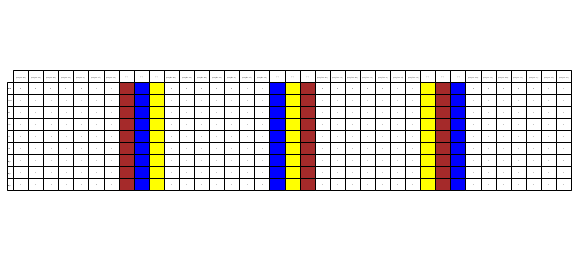

In [ ]:
plot_table(nurse0,len(daily_shift), figSize = (10, 10), saveFig = True)